<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Nonlinear transformations</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.6</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab exercise, we will explore different non-linear transformations as data preprocessing techniques applied to numerical variables. 

When it comes to the logarithmic transformation of the data we make a distinction between three cases:
- Only the dependent/response variable is log-transformed
- Only independent/predictor variable(s) is log-transformed
- Both dependent/response variable and independent/predictor variable(s) are log-transformed

The first case was already covered in lab exercise Ch2. Ex.8. when we checked Moore's law.<br>
For the second case, we will use a small dataset containing the proportion of recalled words at various times.<br>
For the third case, the log transformation will be applied on both the input and output variables of *Mammal species* dataset with response variable as the *Brain weight* (in grams), and *Body weight* (in kilograms), *Gestation period length* (in days), and *Litter size* as predictors.<br>
*The 'Word recall' dataset can be found at https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/wordrecall/index.txt*<br>
*The 'Mammal species' dataset can be found at https://CRAN.R-project.org/package=asbio.*

For power transformation two datasets were used, one regarding the lung capacity (LungCap), the other the red wine quality dataset.
*LungCap* dataset obtained from the R package of GLMsData.<br>
*Red wine quality* dataset is available at UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/wine+quality
In Quantile transformation, the Boston house price dataset was used, which is part of the *scikit-learn* library.

### Table of contents
1. [Logarithmic transformations](#LogTransf)
2. [Variance stabilizing transformations](#VarStabTransf)
3. [Power transformations](#PowerTransf)
4. [Quantile transformation](#Quantile)
5. [Normalizing the data](#DataNormalization)

## 1. Logarithmic transformations <a name="LogTransf"></a>

Let's import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

### Log transformation of the response variable

Such an example was already presented in lab exercise Ch2. Ex. 8. In that lab, we checked the validity of Moore's law with the data from Wikipedia regarding the number of transistors in the processors each year.

Let's load this dataset again.

In [2]:
dataMoore=pd.DataFrame(data=np.array(pd.read_csv(os.path.join('data','TransistorCount.csv'))\
                [['Date of introduction','Transistor count']]),columns=['Year','NrOfTransistors'])
dataMoore['LogNrOfTransistors']=np.log(dataMoore['NrOfTransistors'])
dataMoore

,Year,NrOfTransistors,LogNrOfTransistors
0,1971,2300,7.740664
1,1972,3500,8.160518
2,1974,8000,8.987197
3,1974,4100,8.318742
4,1974,4500,8.411833
...,...,...,...
115,2017,9700000000,22.995392
116,2017,18000000000,23.613638
117,2017,19200000000,23.678176
118,2018,6900000000,22.654787


And print out the OLS results for the original data using the *statsmodels* library.

In [3]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
resultsMoore = ols(formula = 'NrOfTransistors ~ Year', data=dataMoore).fit()
print(resultsMoore.summary(title='OLS Results for original "Transistor count" dataset'))
test = sms.het_goldfeldquandt(resultsMoore.resid, resultsMoore.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsMoore.mse_resid))

             OLS Results for original "Transistor count" dataset              
Dep. Variable:        NrOfTransistors   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     43.84
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           1.11e-09
Time:                        22:22:59   Log-Likelihood:                -2795.9
No. Observations:                 120   AIC:                             5596.
Df Residuals:                     118   BIC:                             5601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.864e+11   4.35e+10     -6.576      0.0

The R-squared value is very low, while the RMSE is extremely high. Also, the standard errors are extremely high, which shows that our model is useless. Moreover, according to the Goldfeld-Quandt test, we cannot reject the null hypothesis that we have a heteroskedasticity issue. Thus, we can conclude that the linear regression on the original data is not an optimal solution. 

We may plot the estimated regression line together with the 95% confidence interval on the scatter plot of the original data.

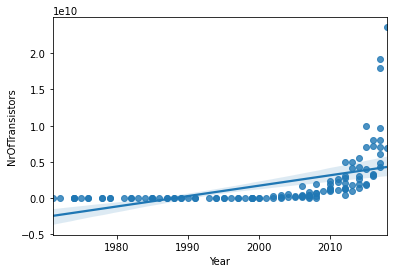

In [4]:
sns.regplot(x="Year", y="NrOfTransistors", data=dataMoore)
plt.show()

Let's create the scatter plot of the residuals to have a visual tool for analysis.

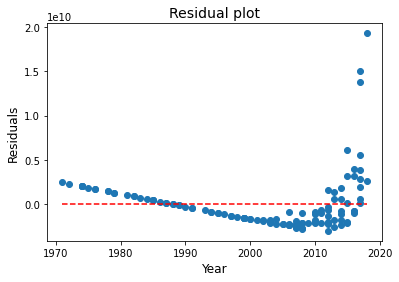

In [5]:
plt.scatter(dataMoore['Year'],resultsMoore.resid)
plt.plot([dataMoore['Year'].min(),dataMoore['Year'].max()],[0,0],'r--')
plt.title("Residual plot",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

We may create the QQ plot to check for normality of the residuals.

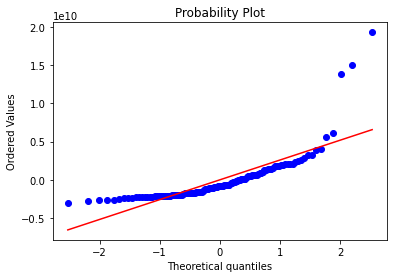

In [6]:
from scipy import stats
stats.probplot(resultsMoore.resid,plot=plt)
plt.show()

As can be seen, the residuals are not following a normal distribution. That is problematic only for confidence interval creation and hypothesis testing. However, the scatter plot shows that the residuals are not dispersed evenly around the horizontal dashed line, which is a severe indication that the linear regression is not a good fit for the original data.

Let's take the logarithm of the response variable and print out the OLS results using the modified data.

In [7]:
resultsLogMoore = ols(formula = 'LogNrOfTransistors ~ Year', data=dataMoore).fit()
print(resultsLogMoore.summary(title='OLS Results for log-linear "Transistor count" dataset'))
test = sms.het_goldfeldquandt(resultsLogMoore.resid, resultsLogMoore.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLogMoore.mse_resid))

            OLS Results for log-linear "Transistor count" dataset             
Dep. Variable:     LogNrOfTransistors   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2713.
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.81e-83
Time:                        22:23:00   Log-Likelihood:                -167.12
No. Observations:                 120   AIC:                             338.2
Df Residuals:                     118   BIC:                             343.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -677.4018     13.343    -50.770      0.0

Now, the R-squared value is very high, while the RMSE value is much lower than previously. Moreover, according to the Goldfeld-Quandt test, now we can reject the null hypothesis of heteroskedasticity.

One might argue that RMSE is on a different scale now, as being calculated from the logarithm of the response variable. So, let's exponentiate the RMSE.

In [8]:
np.exp(np.sqrt(resultsLogMoore.mse_resid))

2.6706494351157013

That is still very low, and taking into account that the response variable represents the number of transistors, the RMSE in the original scale is still minor.

We may plot the estimated regression line together with the 95% confidence interval on the scatter plot of the log-linear data using the *seaborn* library.

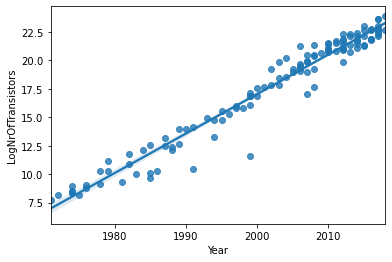

In [9]:
sns.regplot(x="Year", y="LogNrOfTransistors", data=dataMoore,ci=95)
plt.show()

Again, we may create the scatter plot of the residuals for visual inspection.

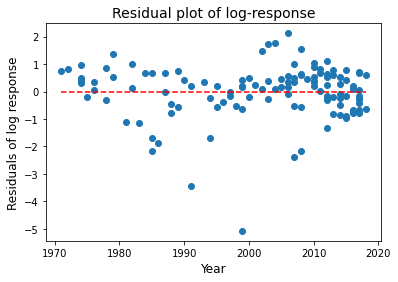

In [10]:
plt.scatter(dataMoore['Year'],resultsLogMoore.resid)
plt.plot([dataMoore['Year'].min(),dataMoore['Year'].max()],[0,0],'r--')
plt.title("Residual plot of log-response",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Residuals of log response",fontsize=12)
plt.show()

Let's check the normality of the residuals with the QQ plot

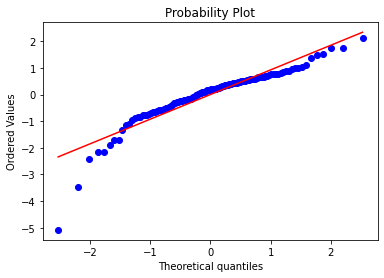

In [11]:
stats.probplot(resultsLogMoore.resid,plot=plt)
plt.show()

If we want to understand the meaning of the regression coefficient (slope), let's exponentiate it, then subtract one from this number, and finally multiply it by 100. In general, the obtained number represents the percent increase (for positive) or decrease (for negative) of the response for every unit increase in the predictor. In this example, that number would represent the percent increase in the number of transistors after each year.

In [12]:
(np.exp(resultsLogMoore.params[1])-1)*100

41.51339297954848

Thus, every year the number of transistors will increase by 41.51%.

But we may interpret the exponentiated regression coefficient as showing the number of times the response will increase (or decrease):

In [13]:
np.exp(resultsLogMoore.params[1])

1.4151339297954848

Now, let's check what would be the cumulative increase in two years (1.41 x 1.41).

In [14]:
(np.exp(resultsLogMoore.params[1]))**2

2.002604039258412

And indeed - as Moore's law stated - the increase is two fold every two years.

We may check the distribution of the response before and after the log-transformation.

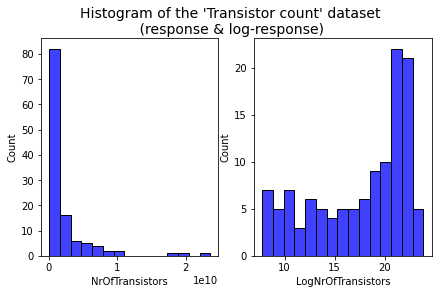

In [15]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
sns.histplot(dataMoore["NrOfTransistors"] , bins=15, color="blue", ax=axes[0],kde=False)
sns.histplot(dataMoore["LogNrOfTransistors"] , bins=15, color="blue", ax=axes[1],kde=False)
fig.suptitle("Histogram of the 'Transistor count' dataset\n (response & log-response)"\
             ,y=0.99,fontsize=14)
plt.show()

As can be seen, the transistor count has a positive skew (skewed to the left), but after the log-transformation has a slightly negative skew (skewed to the right).

Conclusion of the log-transformation of the response:
- a non-linear relationship becomes linear
- the highly left-skewed data (response variable) becomes slightly right-skewed
- the heteroskedasticity issue has been eliminated
- the log-linear model provides a very good model (with very high R-squared and low RMSE value)
- the standard errors for the regression coefficients are very low

Earlier, we visualized the regression plot of the log-linear model together with the 95% confidence interval using the *seaborn* library. Now, let's do it again, but at this time using the formulas derived in the book. 

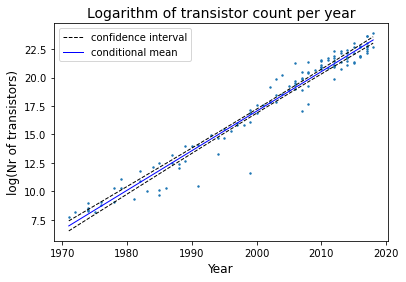

In [16]:
RMSE=np.sqrt(resultsLogMoore.mse_resid)
x_=np.array(dataMoore['Year'])[:,np.newaxis]
logyhat_=np.array(resultsLogMoore.fittedvalues)[:,np.newaxis]
N,_=dataMoore.shape

alpha=0.05         # confidence level
df=N-2        # degree of freedom
tscore = abs(stats.t.ppf(alpha/2, df))

conf_int_min_=logyhat_-tscore*RMSE*np.sqrt(1/N+(x_-x_.mean())**2/np.sum((x_-x_.mean())**2))
conf_int_max_=logyhat_+tscore*RMSE*np.sqrt(1/N+(x_-x_.mean())**2/np.sum((x_-x_.mean())**2))

# Plot the confidence interval for the mean of yhat
line1,=plt.plot(x_,conf_int_min_,'--k',lw=1)
plt.plot(x_,conf_int_max_,'--k',lw=1)
line2,=plt.plot(x_,logyhat_,'b',lw=1)
plt.xlabel('Year',fontsize=12)
plt.ylabel('log(Nr of transistors)',fontsize=12)
plt.title('Logarithm of transistor count per year',fontsize=14)
plt.scatter(dataMoore['Year'],dataMoore['LogNrOfTransistors'],s=2)
plt.legend([line1, line2],['confidence interval','conditional mean'],fontsize=10)
plt.show()

We can create a similar plot for the original data using the formulas derived in the book.

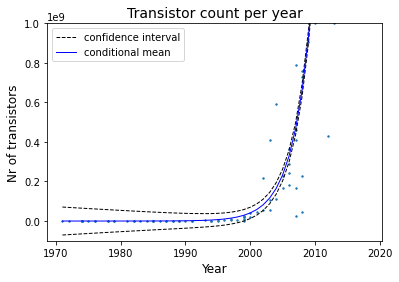

In [17]:
yhat_=np.exp(logyhat_)*np.exp(RMSE**2/2)
stddev=np.sqrt(np.exp(2*logyhat_.mean()+RMSE**2)*np.exp(np.exp(RMSE**2)-1))

conf_int_min_=yhat_-tscore*stddev*np.sqrt(1/N+(x_-x_.mean())**2/np.sum((x_-x_.mean())**2))
conf_int_max_=yhat_+tscore*stddev*np.sqrt(1/N+(x_-x_.mean())**2/np.sum((x_-x_.mean())**2))
line1,=plt.plot(x_,conf_int_min_,'--k',lw=1)
plt.plot(x_,conf_int_max_,'--k',lw=1)
line2,=plt.plot(x_,yhat_,'b',lw=1)
plt.scatter(dataMoore['Year'],dataMoore['NrOfTransistors'],s=2)
plt.ylim(-1e8,1e9)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Nr of transistors',fontsize=12)
plt.title('Transistor count per year',fontsize=14)
plt.legend([line1, line2],['confidence interval','conditional mean'],fontsize=10)
plt.show()

As can be seen, the 95% confidence interval is much wider at the beginning of our time interval and, as we are closer to the current date, the confidence interval becomes very narrow. In fact, we had to limit the y axis to be able to distinguish between the upper and lower bounds of the confidence interval. That provides higher confidence in near future predictions.

### Log transformation of the predictor variable

There are cases when not the response, but the predictor shall be log-transformed. For example, the "Word recall" dataset was created from a memory retention experiment, in which 13 subjects were asked to memorize a list of disconnected items. The subjects were then asked to recall the items at various times up to a week later. The proportion of items *prop* correctly recalled at various times *time*) in minutes since the list was memorized were recorded.

Let's read the dataset in pandas dataframe.

In [18]:
dataWR = pd.read_csv(os.path.join('data','WordRecall.csv'),sep='\t')
dataWR

,time,prop
0,1,0.84
1,5,0.71
2,15,0.61
3,30,0.56
4,60,0.54
5,120,0.47
6,240,0.45
7,480,0.38
8,720,0.36
9,1440,0.26


Let's create the scatter plot together with the estimated regression line to have a visual inspection tool.

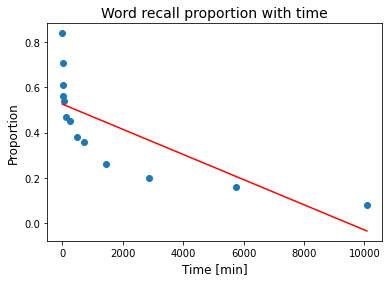

In [19]:
plt.scatter(dataWR['time'],dataWR['prop'])
plt.title('Word recall proportion with time',fontsize=14)
plt.xlabel('Time [min]',fontsize=12)
plt.ylabel('Proportion',fontsize=12)
lr=LinearRegression()
lr.fit(np.array(dataWR['time']).reshape(-1,1),dataWR['prop'])
ymin,ymax=lr.intercept_+lr.coef_[0]*dataWR['time'].min(),\
lr.intercept_+lr.coef_[0]*dataWR['time'].max()
plt.plot([dataWR['time'].min(),dataWR['time'].max()],[ymin,ymax],'r-')
plt.show()

We may use the *statsmodels* library to summarize the OLS results.

In [20]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
resultsWR = ols(formula = 'prop ~ time', data=dataWR).fit()
print(resultsWR.summary(title='OLS Results for original "Word recall" dataset'))
test = sms.het_goldfeldquandt(resultsWR.resid, resultsWR.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsWR.mse_resid))

                OLS Results for original "Word recall" dataset                
Dep. Variable:                   prop   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     14.63
Date:                Thu, 24 Dec 2020   Prob (F-statistic):            0.00282
Time:                        22:23:02   Log-Likelihood:                 7.1057
No. Observations:                  13   AIC:                            -10.21
Df Residuals:                      11   BIC:                            -9.082
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5259      0.049     10.774      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The F-statistic shows that our model is not better than using the mean of the predictor. Based on the Goldfeld-Quandt test, we may reject the null hypothesis of constant variance. Let's check the scatter plot of the residuals for visual inspection.

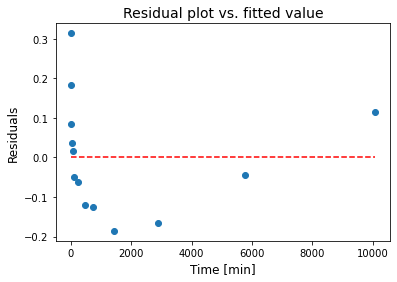

In [21]:
plt.scatter(dataWR['time'],resultsWR.resid)
plt.plot([dataWR['time'].min(),dataWR['time'].max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Time [min]",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

It is clear from the scatter plot of the residuals that the variance of the residuals is not constant, and the linear model is not a good fit.

Let's create a new input variable, which is the natural logarithm of the time, and call this new input variable "log_time".

In [22]:
dataWR['log_time']=dataWR.drop(columns='prop').apply(np.log10,axis=0)
dataWR

,time,prop,log_time
0,1,0.84,0.000000
1,5,0.71,0.698970
2,15,0.61,1.176091
3,30,0.56,1.477121
4,60,0.54,1.778151
5,120,0.47,2.079181
6,240,0.45,2.380211
7,480,0.38,2.681241
8,720,0.36,2.857332
9,1440,0.26,3.158362


Then make a new scatter plot, but at this time, use the newly created predictor.

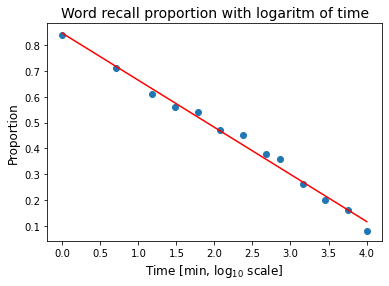

In [23]:
plt.scatter(dataWR['log_time'],dataWR['prop'])
plt.title('Word recall proportion with logaritm of time',fontsize=14)
plt.xlabel('Time [min, $\log_{10}$ scale]',fontsize=12)
plt.ylabel('Proportion',fontsize=12)
lr.fit(np.array(dataWR['log_time']).reshape(-1,1),dataWR['prop'])
ymin,ymax=lr.intercept_+lr.coef_[0]*dataWR['log_time'].min(),\
lr.intercept_+lr.coef_[0]*dataWR['log_time'].max()
plt.plot([dataWR['log_time'].min(),dataWR['log_time'].max()],[ymin,ymax],'r-')
plt.show()

From the scatter plot above, it is clear that we have a much better fit using the linear-log model.

Let's print out the summary of the new OLS results.

In [24]:
resultsLogWR = ols(formula = 'prop ~ log_time', data=dataWR).fit()
print(resultsLogWR.summary(title='OLS Results for linear-log "Word recall" dataset'))
test = sms.het_goldfeldquandt(resultsLogWR.resid, resultsLogWR.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLogWR.mse_resid))

               OLS Results for linear-log "Word recall" dataset               
Dep. Variable:                   prop   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1076.
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.53e-12
Time:                        22:23:03   Log-Likelihood:                 31.462
No. Observations:                  13   AIC:                            -58.92
Df Residuals:                      11   BIC:                            -57.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8464      0.014     59.628      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


As can be seen, the R-squared value increased from 0.57 to 0.99, while the RMSE decreased from 0.152 to 0.023. Moreover, the F-statistic shows that our model is better than the mean of the response variable. 

Let's make the residual plot.

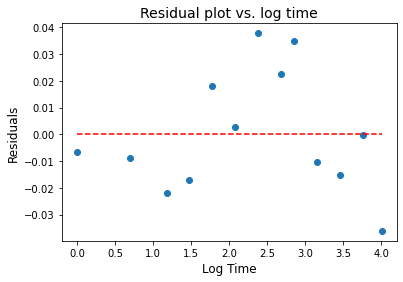

In [25]:
plt.scatter(dataWR['log_time'],resultsLogWR.resid)
plt.plot([dataWR['log_time'].min(),dataWR['log_time'].max()],[0,0],'r--')
plt.title("Residual plot vs. log time",fontsize=14)
plt.xlabel("Log Time",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

In conclusion, by taking the logarithm of the predictor, we obtain a linear regression model that is a good fit for the data.

We may use the *seaborn* library for creating the regression line of the linear-log model, together with the 95% confidence interval.

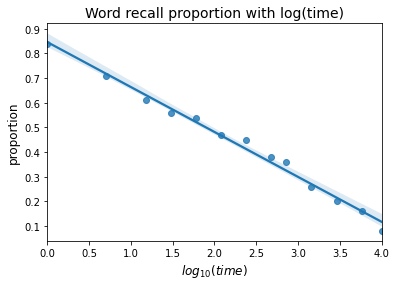

In [26]:
ax = sns.regplot(x="log_time", y="prop", data=dataWR, logx=False, ci=95)
ax.set_xlabel(r'$log_{10}(time)$',fontsize=12)
ax.set_ylabel('proportion',fontsize=12)
ax.set_title('Word recall proportion with log(time)',fontsize=14)
plt.show()

Using the *seaborn* library, by setting logx=True, you may even make this plot in the original space of the predictor.

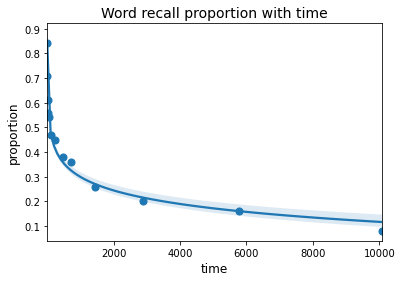

In [27]:
ax = sns.regplot(x="time", y="prop", data=dataWR, x_estimator=np.mean, logx=True,ci=95)
ax.set_xlabel('time',fontsize=12)
ax.set_ylabel('proportion',fontsize=12)
ax.set_title('Word recall proportion with time',fontsize=14)
plt.show()

### Log transformation of both the response and predictors

In this example, we will check how the brain weight of mammals is related to some of their physical attributes.

As a first step, we read the *Asbio_data_case0902* file into a pandas dataframe.

In [28]:
data = pd.read_csv(os.path.join('data','Asbio_data_case0902.csv'))
data

,Xs,Y,Xb,Xg,Xl
0,Quokka,17.50,3.500,26,1.0
1,Hedgehog,3.50,0.930,34,4.6
2,Tree shrew,3.15,0.150,46,3.0
3,Elephant shrew I,1.14,0.049,51,1.5
4,Elephant shrew II,1.37,0.064,46,1.5
...,...,...,...,...,...
91,Duikers,93.00,13.000,120,1.0
92,Black buck antilope,200.00,39.000,180,1.0
93,Barbary sheep,210.00,66.000,158,1.2
94,Domestic sheep,125.00,49.000,150,2.4


The dataset consists of 96 observations with the following five variables:
- Xs - A factor defining common names for mammal species under examination;
- Y - Brain weight (in grams);
- Xb - Body weight (in kilograms);
- Xg - Gestation period length (in days);
- Xl - Litter size.

Let's see the statistics of the variables.

In [29]:
data.describe()

,Y,Xb,Xg,Xl
count,96.000000,96.000000,96.000000,96.000000
mean,218.976979,108.327750,151.260417,2.310417
std,506.968011,329.411403,108.066086,1.747026
min,0.450000,0.017000,16.000000,1.000000
25%,12.600000,2.075000,63.000000,1.000000
50%,74.000000,8.900000,133.500000,1.200000
75%,260.000000,94.750000,226.250000,3.200000
max,4480.000000,2800.000000,655.000000,8.000000


#### Fitting regression model without any pre-processing

We may create a scatter plot matrix to have a visual inspection of our data. 

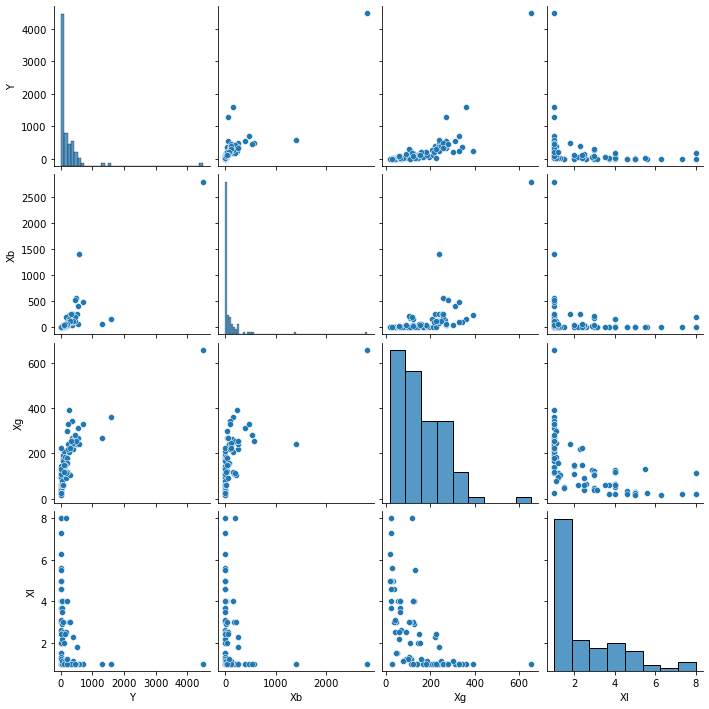

In [30]:
import seaborn as sns
sns.pairplot(data)
plt.show()

From the first row, which gives some hint on the correlation among the response and each of the predictors, we may suspect the presence of some outliers. 

Let's fit the simple linear regression using each predictor individually.

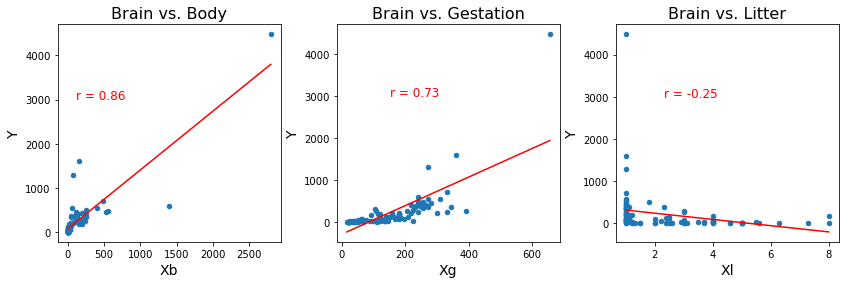

In [31]:
X=np.array(data[["Xb","Xg","Xl"]])
N,D=X.shape
Xdot=(np.insert(X,0,np.ones(N),axis=1))
y_=np.array(data['Y'])[:,np.newaxis]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
plt.subplots_adjust(wspace = 0.25)
xvarlist=['Body','Gestation','Litter']
linregr=LinearRegression()
for i in range(D):
    ax[i].scatter(X[:,i],y_,s=20)
    x_=X[:,i].reshape(-1,1)
    linregr.fit(x_,y_)
    ax[i].plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='r')
    ax[i].set_xlabel(list(data.columns.values)[i+2],fontsize=14)
    ax[i].set_ylabel(list(data.columns.values)[1],fontsize=14)
    ax[i].set_title('Brain vs. '+xvarlist[i],fontsize=16)
    ax[i].annotate('r = '+'%.2f'%np.corrcoef(np.append(X,y_,axis=1), rowvar=False)[:,-1][i],\
                   xy=(X.mean(axis=0)[i],3000),color='red',fontsize=12)
plt.show()

From the above plots, we can observe that both *Y* vs. *Xb* and *Y* vs. *Xg* have an outlier in both x and y direction. Thus, they might represent potential influential points.

Let's create the histogram for each input/output variable.

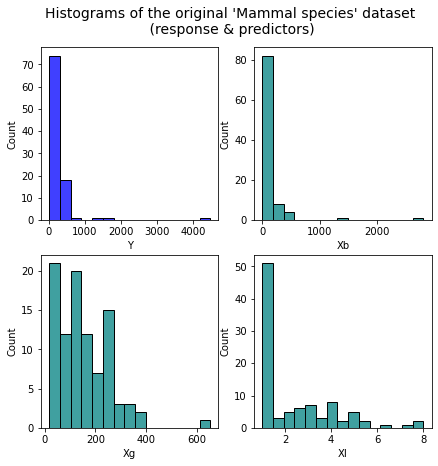

In [32]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data["Y"] , bins=15, color="blue", ax=axes[0, 0],kde=False)
sns.histplot(data["Xb"] , bins=15, color="teal", ax=axes[0, 1],kde=False)
sns.histplot(data["Xg"] , bins=15, color="teal", ax=axes[1, 0],kde=False)
sns.histplot(data["Xl"] , bins=15, color="teal", ax=axes[1, 1],kde=False)
fig.suptitle("Histograms of the original 'Mammal species' dataset\n (response & predictors)"\
             ,y=0.96,fontsize=14)
plt.show()

From the above histograms, we may observe that both input and output variables are skewed to the left (positive skewness).

Now, let's fit the multiple linear regression model using the *statsmodels* library.

In [33]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
results = ols(formula = 'Y ~ Xb + Xg + Xl', data=data).fit()
print(results.summary(title='OLS Results for original "Mammal species" dataset'))
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(results.mse_resid))

              OLS Results for original "Mammal species" dataset               
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     130.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           4.64e-33
Time:                        22:23:08   Log-Likelihood:                -653.93
No. Observations:                  96   AIC:                             1316.
Df Residuals:                      92   BIC:                             1326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -225.2921     83.059     -2.712      0.0

The adjusted R-squared value is quite high as 80% of the mammal's brain variation is explained by the body weight, gestation period, and litter size. However, according to the Goldfeld-Quandt test, we cannot reject the null hypothesis that we have a heteroskedasticity issue.

Moreover, the condition number is high, which might indicate the presence of collinearity. So let's check the variance inflation factors.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("VIF for Xb =",variance_inflation_factor(Xdot,1))
print("VIF for Xg =",variance_inflation_factor(Xdot,2))
print("VIF for Xl =",variance_inflation_factor(Xdot,3))

VIF for Xb = 1.8171683709147999
VIF for Xg = 2.7640155723936335
VIF for Xl = 1.7436732451578507


VIF values are well below 10, even below 5, so there is no multicollinearity issue.

We may check the Pearson correlation coefficient among the variables.

In [35]:
data[["Y","Xb","Xg","Xl"]].corr()

,Y,Xb,Xg,Xl
Y,1.000000,0.864027,0.728191,-0.254561
Xb,0.864027,1.000000,0.624674,-0.182737
Xg,0.728191,0.624674,1.000000,-0.603752
Xl,-0.254561,-0.182737,-0.603752,1.000000


The correlation coefficients are high not only between response and predictor variables but also between some of the predictors.

We may create the scatter plot of the residuals.

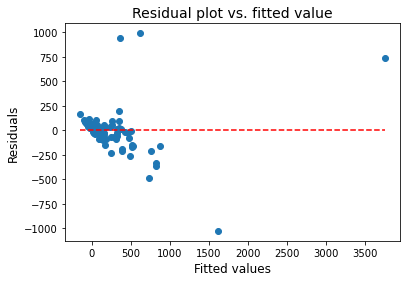

In [36]:
plt.scatter(results.fittedvalues,results.resid)
plt.plot([results.fittedvalues.min(),results.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

And indeed, you may find that there is some increase in the residuals as the fitted value increases. 

According to the Jarque-Bera test, the normality of the errors can be also rejected. We may also check for normality of the residual by creating the QQ normal probability plot for the absolute residuals, respective for the studentized residuals.

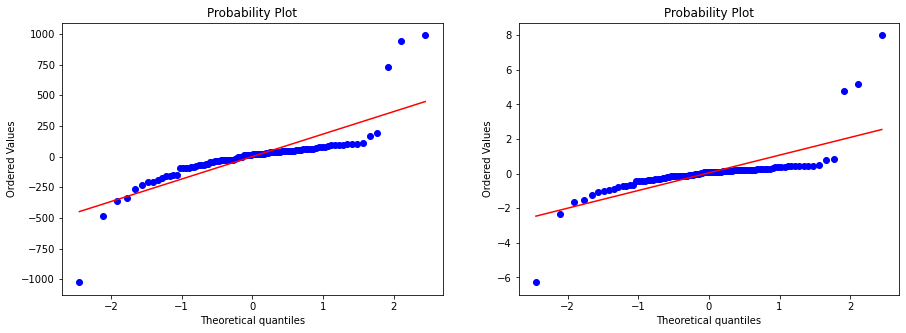

In [37]:
from scipy import stats
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(results.resid, plot=ax[0])
stats.probplot(results.get_influence().resid_studentized_external, plot=ax[1])
plt.show()

Looking at these normal probability plots, you may also suspect the presence of outliers.

In Lab exercise 3.4, we discussed different leave-one-out outlier diagnostic methods. Using the knowledge acquired before, let's summarize the findings of outlier diagnostics by creating a function that will return a pandas dataframe (table) with a list of problematic data points. This function then can be reused later on, is required.

In [38]:
def OutlierDiagnostic(OLSresults,dataset,idx_start=0):
    from scipy import stats

    def outliertype(idx):
        outlier=[]
        if idx in idx_X:
            outlier.append('X')
        if idx in idx_R:
            outlier.append('R')
        if idx in idx_B:
            outlier.append('B')
        if idx in idx_F:
            outlier.append('F')
        if idx in idx_C:
            outlier.append('C')
        if idx in idx_D:
            outlier.append('D')
        return outlier
   
    D=int(OLSresults.df_model)
    N=int(OLSresults.nobs)
    h_=OLSresults.get_influence().hat_matrix_diag[:,np.newaxis]
    idx_X=np.nonzero(h_>=3*h_.mean())[0]
    rstud_=OLSresults.get_influence().resid_studentized_external
    idx_R=np.nonzero(np.abs(rstud_)>2.0)[0]
    dffits_,dffits_threshold=OLSresults.get_influence().dffits
    idx_F=np.nonzero(np.abs(dffits_)>dffits_threshold)[0]
    DFBETAS=OLSresults.get_influence().dfbetas
    dfbetas_threshold=2/np.sqrt(N)
    idx_B,idx_w=np.nonzero(np.abs(DFBETAS)>dfbetas_threshold)
    idx_C=np.nonzero(np.abs(OLSresults.get_influence().cov_ratio-1)>=3*(D+1)/N)[0]
    cook_,pval_=OLSresults.get_influence().cooks_distance
    cook_threshold=stats.f.sf(0.5,D+1,N-D-1)
    idx_D=np.nonzero(cook_>cook_threshold)[0]

    #columnlst=['Index','Y']
    columnlst=['Index',OLSresults.summary().as_csv().split('Dep. Variable:   ,')[1].split(',')[0].strip(' ')]
    columnlst.extend(OLSresults.params.keys()[1:])
    columnlst.extend(["Cook's dist.",'Type','Note'])
    df=pd.DataFrame(columns=columnlst)
    idx=np.sort(np.append(idx_X,idx_R))
    idx=np.sort(np.append(idx,idx_B))
    idx=np.sort(np.append(idx,idx_F))
    idx=np.sort(np.append(idx,idx_C))
    idx=np.sort(np.append(idx,idx_D))
    dx=np.unique(idx)
    for i in dx:
        rowlst=[i+idx_start,dataset.iloc[i][columnlst[1]]]
        rowlst.extend(np.array([dataset.iloc[i][columnlst[col+2]] for col in range(D)],dtype=object))
        rowlst.extend(np.array([cook_[i],outliertype(i),['w_'+str(idx_w[i]) \
                                                         for i in list(np.ravel(np.nonzero(i==idx_B)))]],dtype=object))
        df.loc[i]=rowlst
    df['Index']=df['Index'].astype(int)
    return df

# Calling our outlier diagnostic function
OutlierDiagnostic(results,data)

,Index,Y,Xb,Xg,Xl,Cook's dist.,Type,Note
0,0,17.50,3.50,26,1.0,0.011452,[B],[w_0]
23,23,1300.00,65.00,270,1.0,0.167638,"[R, B, F, C]","[w_0, w_1, w_2]"
38,38,0.72,0.05,23,7.3,0.000192,[C],[]
39,39,2.38,0.34,21,8.0,0.000898,"[X, C]",[]
51,51,1600.00,160.00,360,1.0,0.451797,"[R, B, F, C]","[w_0, w_1, w_2, w_3]"
71,71,4480.00,2800.00,655,1.0,24.296782,"[X, R, B, F, C, D]","[w_0, w_1, w_3]"
74,74,250.00,230.00,390,1.0,0.134116,"[R, B, F]","[w_0, w_1, w_2, w_3]"
76,76,180.00,190.00,115,8.0,0.054787,"[X, B, F, C]","[w_0, w_2, w_3]"
77,77,590.00,1400.00,240,1.0,2.338573,"[X, R, B, F, C, D]","[w_0, w_1, w_2, w_3]"
79,79,225.00,93.00,330,1.0,0.026427,[B],[w_2]


Several observations are marked as problematic by different leave-one-out outlier diagnostic methods. What is really surprising that there are two observations with very high Cook's distance, both well above 1.

Let's create the squared studentized residuals versus leverages plot together with the contour plot of Cook's distances. Based on the knowledge already acquired in Ex. 3.3 let's create a function, which can be reused in later lab exercises.

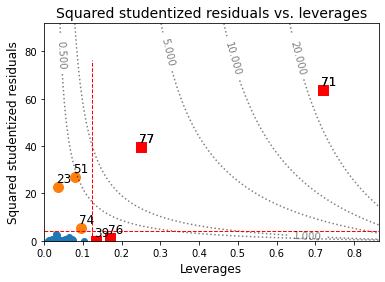

In [39]:
def SquaredStudResidLeveragePlot(OLSresults,CookLevels=None,textdx=0,textdy=0,xyscale=1.2):
    N=int(OLSresults.nobs)
    D=int(OLSresults.df_model)
    h_=OLSresults.get_influence().hat_matrix_diag[:,np.newaxis]
    idx_X=np.nonzero(h_>=3*h_.mean())[0]
    rstud_=OLSresults.get_influence().resid_studentized_external
    idx_R=np.nonzero(np.abs(rstud_)>2.0)[0]
    plt.scatter(h_,rstud_**2)
    plt.scatter(h_[idx_R],rstud_[idx_R]**2,s=100)
    for i in idx_R:
        plt.annotate(i, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+textdx,float(rstud_[i]**2)+textdy),fontsize=12)
    plt.scatter(h_[idx_X],rstud_[idx_X]**2,s=100,c='r',marker='s')
    for i in idx_X:
        plt.annotate(i, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+textdx,float(rstud_[i]**2)+textdy),fontsize=12)
    plt.plot([3*h_.mean(),3*h_.mean()],[0,xyscale*(rstud_.max())**2],'r--',lw=1)
    plt.plot([0,xyscale*h_.max()],[4,4],'r--',lw=1)
    plt.xlabel('Leverages',fontsize=12)
    plt.ylabel('Squared studentized residuals',fontsize=12)
    plt.title("Squared studentized residuals vs. leverages",fontsize=14)

    if CookLevels!=None:
        # Adding contour plot of the Cook's distances
        x = np.linspace(0, xyscale*h_.max(), 100)
        y = np.linspace(0, (xyscale*rstud_.max())**2, 100)
        X, Y = np.meshgrid(x, y)
        Z = (N-D-1)/(Y+N-D-2)*Y/(D+1)*X/(1-X)
        CS=plt.contour(X, Y, Z, colors='black',levels=CookLevels,linestyles="dotted",alpha=0.5)
        plt.clabel(CS)
        plt.show()
               
# Calling the r_stud**2 x leverage plot function
SquaredStudResidLeveragePlot(results,CookLevels=[0.5,1.0,5.0,10.0,20.0],textdx=-0.005,textdy=2)

From the above graph, it is obvious that observation 77, and especially observation 71 should be an influential point because they have both high leverage and studentized residual. Moreover, Cook's distance for both these observations is well beyond the threshold of 1.

So, let's fit another multiple linear regression model on the reduced dataset by removing observations 71 and 77.

In [40]:
resultsReduced = ols(formula = 'Y ~ Xb + Xg + Xl', data=data.drop(index=[71,77])).fit()
print(resultsReduced.summary(title='OLS Results for "Mammal species" reduced dataset'))
test = sms.het_goldfeldquandt(resultsReduced.resid, resultsReduced.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsReduced.mse_resid))

               OLS Results for "Mammal species" reduced dataset               
Dep. Variable:                      Y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     35.80
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.54e-15
Time:                        22:23:09   Log-Likelihood:                -615.64
No. Observations:                  94   AIC:                             1239.
Df Residuals:                      90   BIC:                             1249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -138.8112     66.771     -2.079      0.0

Although the RMSE decreased from 224.56 grams to 172.8 grams, that shall be considered as still high. When predicting the mean brain weight for the mammal based on the body weight, the gestation period, and the litter size, we still make an error of 172.8 grams, on average. 

Moreover, the R-squared value also decreased substantially: from 0.8 to 0.53. Thus, by removing two observations out of the  96, we ended up in a model that explains only 53% of the variation in brain weight.

According to the Goldfeld-Quandt test, we may still have heteroskedasticity issues, so let's create another residual plot.

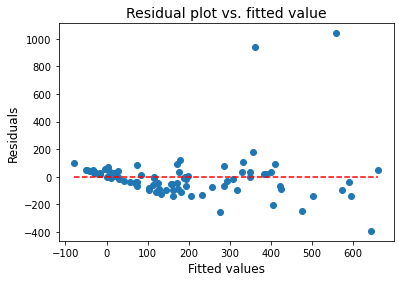

In [41]:
plt.scatter(resultsReduced.fittedvalues,resultsReduced.resid)
plt.plot([resultsReduced.fittedvalues.min(),resultsReduced.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

According to the Jarque-Bera test, we still have non-normal errors. Let's have again the QQ normal probability plot of the absolute and studentized residuals.

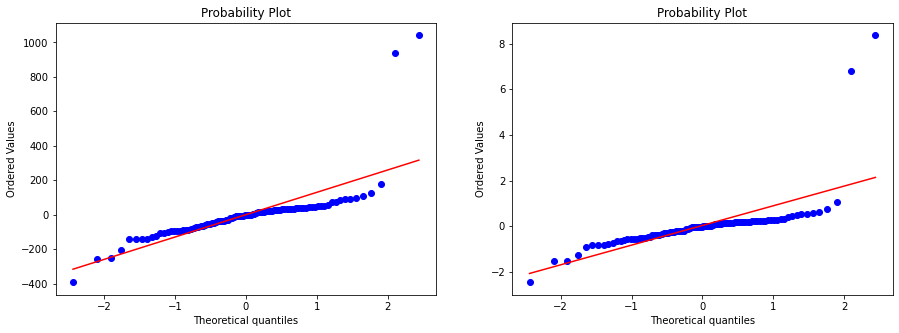

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(resultsReduced.resid, plot=ax[0])
stats.probplot(resultsReduced.get_influence().resid_studentized_external, plot=ax[1])
plt.show()

According to the normal probability plot, outliers may still be present even for the reduced dataset. Because the p-value shows that the coefficient of *Xl* is not significantly different from zero, we may try to refit the linear regression model using only two predictors.

In [43]:
resultsReduced2 = ols(formula = 'Y ~ Xb + Xg', data=data.drop(index=[71,77])).fit()
print(resultsReduced2.summary(title='OLS Results for "Mammal species" reduced dataset with only two predictors'))
test = sms.het_goldfeldquandt(resultsReduced2.resid, resultsReduced2.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsReduced2.mse_resid))

  OLS Results for "Mammal species" reduced dataset with only two predictors   
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     53.19
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           5.01e-16
Time:                        22:23:10   Log-Likelihood:                -616.16
No. Observations:                  94   AIC:                             1238.
Df Residuals:                      91   BIC:                             1246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -80.8845     33.507     -2.414      0.0

RMSE and adjusted R-squared value did not change at all. The Jarque-Bera test still shows a non-normal error, and according to the Goldfeld-Quandt test, we may still have a heteroskedasticity issue.

**Note:** *The overall conclusion is that the multiple linear regression seems to be a dead end.*

#### Fitting regression model after log transformation

So let's create a log transformation for both predictors and response variables. After logarithmic transformation, let's create again a scatter plot matrix.

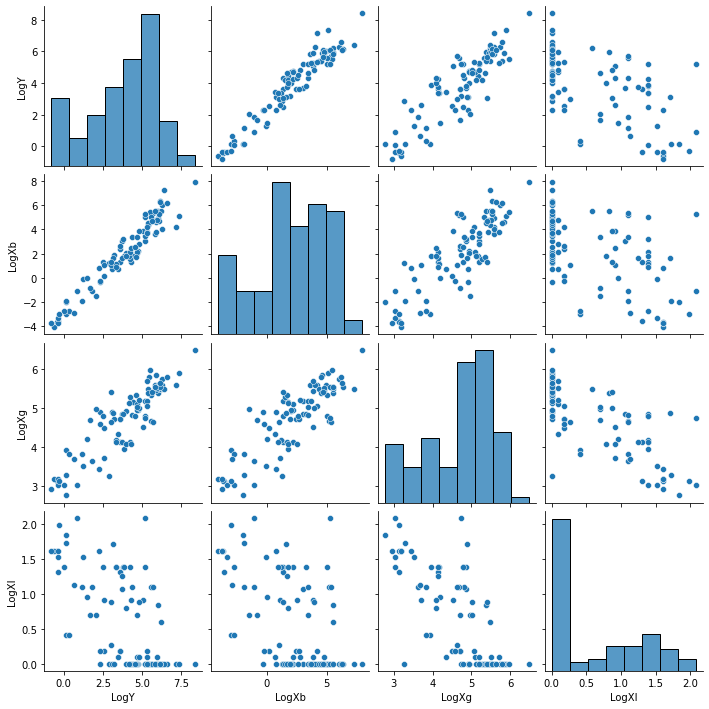

In [44]:
dataLog=data.drop(columns='Xs').apply(np.log,axis=0)
dataLog.columns=['LogY', 'LogXb', 'LogXg', 'LogXl']
sns.pairplot(dataLog)
plt.show()

Examining the above scatter plots, the first thing to notice that the outlier data points disappeared. Comparing the diagonal histograms with the original ones, we may also realize that the original data is mostly skewed to the left while the transformed one is more centered (although some of them become slightly reight-skewed and the logarithm of litter size is still left-skewed). But we may also observe that the correlation between *Xb* and *Xg* is quite high.

Let's fit the simple linear regression using each predictor individually.

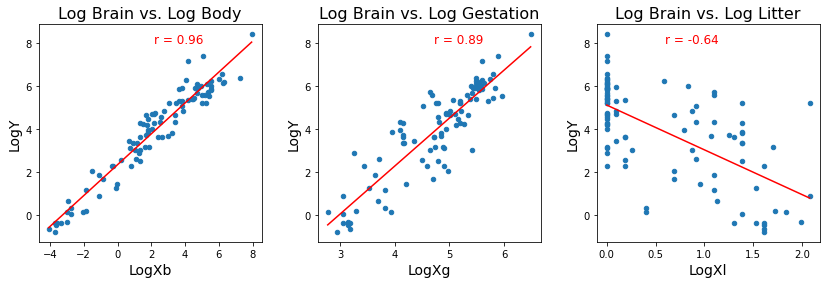

In [45]:
X=np.array(dataLog[["LogXb","LogXg","LogXl"]])
N,D=X.shape
Xdot=(np.insert(X,0,np.ones(N),axis=1))
y_=np.array(dataLog['LogY'])[:,np.newaxis]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
plt.subplots_adjust(wspace = 0.25)
xvarlist=['Log Body','Log Gestation','Log Litter']
linregr=LinearRegression()
for i in range(D):
    ax[i].scatter(X[:,i],y_,s=20)
    x_=X[:,i].reshape(-1,1)
    linregr.fit(x_,y_)
    ax[i].plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='r')
    ax[i].set_xlabel(list(dataLog.columns.values)[i+1],fontsize=14)
    ax[i].set_ylabel(list(dataLog.columns.values)[0],fontsize=14)
    ax[i].set_title('Log Brain vs. '+xvarlist[i],fontsize=16)
    ax[i].annotate('r = '+'%.2f'%np.corrcoef(np.append(X,y_,axis=1), rowvar=False)[:,-1][i],\
                   xy=(X.mean(axis=0)[i],8),color='red',fontsize=12)
plt.show()

We may check the histograms of the log-transformed variables again.

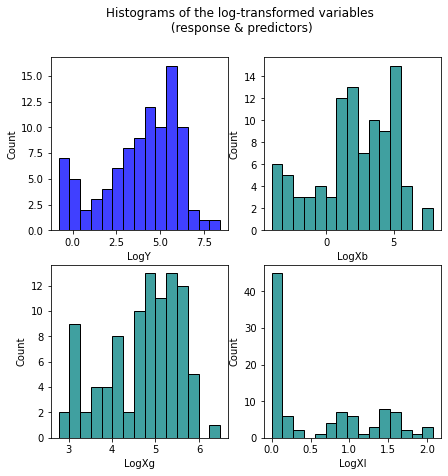

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(dataLog["LogY"] , bins=15, color="blue", ax=axes[0, 0],kde=False)
sns.histplot(dataLog["LogXb"] , bins=15, color="teal", ax=axes[0, 1],kde=False)
sns.histplot(dataLog["LogXg"] , bins=15, color="teal", ax=axes[1, 0],kde=False)
sns.histplot(dataLog["LogXl"] , bins=15, color="teal", ax=axes[1, 1],kde=False)
fig.suptitle("Histograms of the log-transformed variables\n (response & predictors)")
#ax[0].set_xlabel('Log Y')
plt.show()

From the scatter plot matrix. we already observed that there is a high correlation between logXg and logXb. So,  let's check the variance inflation factors.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=np.array(dataLog[["LogXb","LogXg","LogXl"]])
N,D=X.shape
Xdot=(np.insert(X,0,np.ones(N),axis=1))

print("VIF for Xb =",variance_inflation_factor(Xdot,1))
print("VIF for Xg =",variance_inflation_factor(Xdot,2))
print("VIF for Xl =",variance_inflation_factor(Xdot,3))

VIF for Xb = 3.7931664690215254
VIF for Xg = 6.268054793517796
VIF for Xl = 2.5448075599598283


The VIF values are increased for all three predictors, although none of them exceeds the threshold of 10. However, for Xg, this is over 5, so some collinearity issues might be present.

Let's check the Pearson correlation coefficients.

In [48]:
dataLog[["LogY","LogXb","LogXg","LogXl"]].corr()

,LogY,LogXb,LogXg,LogXl
LogY,1.000000,0.964291,0.891294,-0.642976
LogXb,0.964291,1.000000,0.845532,-0.545743
LogXg,0.891294,0.845532,1.000000,-0.758340
LogXl,-0.642976,-0.545743,-0.758340,1.000000


The Pearson correlation coefficients are also increased. Not only between the response variable and predictors but also between independent variables.

Let's fit a multiple linear regression model on the log-transformed dataset using the *statsmodels* library.

In [49]:
resultsLog = ols(formula = 'LogY ~ LogXb + LogXg + LogXl', data=dataLog).fit()
print(resultsLog.summary(title='OLS Results for log-transformed "Mammal species" dataset'))
test = sms.het_goldfeldquandt(resultsLog.resid, resultsLog.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLog.mse_resid))

           OLS Results for log-transformed "Mammal species" dataset           
Dep. Variable:                   LogY   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     631.6
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           3.14e-61
Time:                        22:23:14   Log-Likelihood:                -62.659
No. Observations:                  96   AIC:                             133.3
Df Residuals:                      92   BIC:                             143.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8548      0.662      1.292      0.2

The first thing to notice, that there is a huge drop in the RMSE. It dropped from 224.56, obtained with the original dataset, to 0.47. Thus, when predicting the mean brain weight for the mammal, based on the body weight, the gestation period, and the litter size, we are making only an error of 0.47 grams, on average. The adjusted R-square value also improved significantly, now is 0.95.

Moreover, according to the Goldfeld-Quandt test, the null hypothesis of homoskedasticity can be rejected.

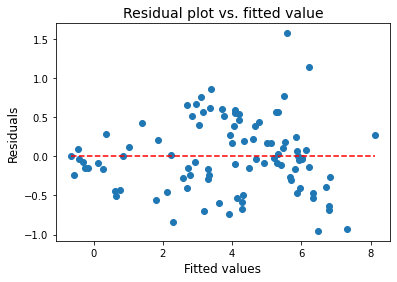

In [50]:
plt.scatter(resultsLog.fittedvalues,resultsLog.resid)
plt.plot([resultsLog.fittedvalues.min(),resultsLog.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

According to the Jarque-Bera, the errors now follow somehow the normal distribution. We may create the normal probability plot for absolute and studentized residuals to check this.

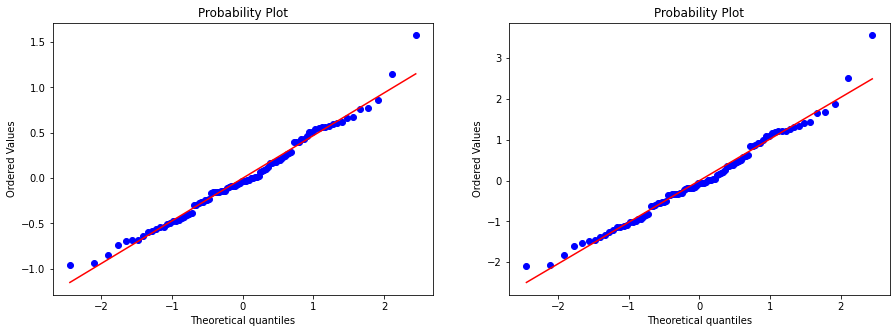

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(resultsLog.resid, plot=ax[0])
stats.probplot(resultsLog.get_influence().resid_studentized_external, plot=ax[1])
plt.show()

And indeed, the residuals now follow roughly the normal distribution.

You may run the leave-one-out outlier diagnostics to see if there are still outliers.

In [52]:
OutlierDiagnostic(resultsLog,dataLog)

,Index,LogY,LogXb,LogXg,LogXl,Cook's dist.,Type,Note
0,0,2.862201,1.252763,3.258097,0.000000,0.002927,"[X, C]",[]
12,12,2.054124,-1.514128,4.976734,0.693147,0.006930,[C],[]
23,23,7.170120,4.174387,5.598422,0.000000,0.064728,"[R, F, C]",[]
24,24,2.484907,1.308333,4.787492,1.386294,0.039458,[B],"[w_0, w_2, w_3]"
30,30,3.806662,3.218876,4.852030,1.386294,0.016056,[B],[w_3]
44,44,3.178054,1.887070,4.727388,0.000000,0.019226,[B],[w_3]
49,49,1.658228,-0.843970,4.700480,0.693147,0.014196,[B],[w_1]
50,50,3.135494,1.609438,4.882802,1.704748,0.003949,[C],[]
51,51,7.377759,5.075174,5.886104,0.000000,0.048343,"[R, B, F, C]","[w_0, w_2]"
72,72,3.020425,1.335001,5.416100,0.875469,0.048499,"[B, F]","[w_0, w_1, w_2, w_3]"


None of the listed problematic data points have both high leverage and high studentized residuals, and none of them has high Cook's distance.

Let's make the squared studentized residuals versus leverages plot, including the contour plot of Cook's distances, to check this visually, too.

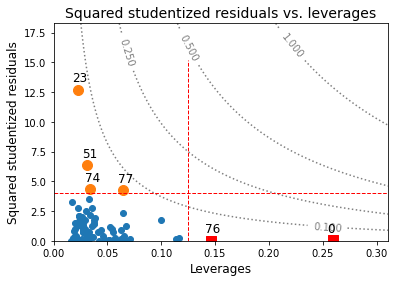

In [53]:
SquaredStudResidLeveragePlot(resultsLog,CookLevels=[0.1,0.25,0.5,1.0],textdx=-0.005,textdy=0.7)

As can be seen in the above figure, none of the observations has, at the same time, both high leverage and high studentized residual. Moreover, all observations have Cook's distances well below 0.1. Thus, we can conclude that no influential points are present in the dataset.

What we may find in the OLS results of the log-transformed dataset, that the intercept is not significantly different from zero, so we might refit the regression model without an intercept.

In [54]:
resultsLogNoIntercept = ols(formula = 'LogY ~ LogXb + LogXg + LogXl -1', data=dataLog).fit()
print(resultsLogNoIntercept.summary(title='OLS Results for log-transformed dataset without intercept'))
test = sms.het_goldfeldquandt(resultsLogNoIntercept.resid, resultsLogNoIntercept.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLogNoIntercept.mse_resid))

               OLS Results for log-transformed dataset without intercept               
Dep. Variable:                   LogY   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              2732.
Date:                Thu, 24 Dec 2020   Prob (F-statistic):                    1.63e-90
Time:                        22:23:15   Log-Likelihood:                         -63.522
No. Observations:                  96   AIC:                                      133.0
Df Residuals:                      93   BIC:                                      140.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The RMSE did not change, while the adjusted R-squared value further improved to 0.99, which is a remarkable result.

**Note:** *We can conclude that while the multiple regression model failed on the original dataset, it performed very well on the log-transformed dataset.*

## 2. Variance stabilizing transformations <a name="VarStabTransf"></a>

We have already seen with log-transformation that the variance of the residuals decreased. So, let's check another example where there are enough data points, so we can see clearly how such a transformation may eliminate the heteroskedasticity problem.

In this example, we will use a dataset containing information about the lung capacity of youth together with their age, height, gender, and behavior, like smoker or nonsmoker.

In [55]:
dataLung=pd.read_csv(os.path.join('data','lungcap.csv'))
dataLung

,Age,FEV,Ht,Gender,Smoke
0,3,1.072,46.0,F,Non-smoker
1,4,0.839,48.0,F,Non-smoker
2,4,1.102,48.0,F,Non-smoker
3,4,1.389,48.0,F,Non-smoker
4,4,1.577,49.0,F,Non-smoker
...,...,...,...,...,...
649,16,4.872,72.0,M,Smoker
650,17,3.082,67.0,M,Smoker
651,17,3.406,69.0,M,Smoker
652,18,4.086,67.0,M,Smoker


The dataset contains 654 observations of youth persons. It has the following variables.
- Age - age of the youth
- FEV - Forced expiratory volume (FEV) measures how much air a person can exhale during a forced breath. Forced expiratory volume is the most important measurement of lung function. A lower FEV value indicates some kind of illness of the lung.
- Ht - the height of the youth in inch
- Gender - can be male or female
- Smoke - the person is a non-smoker or smoker

The aim is to find out if there is a linear function between the FEV as the dependent variable and all the rest as the independent variable. 

The categorical variables will be introduced in the next lab exercise only, so just place them in the formula without explanation (*statsmodels* library will know how to convert those variables to 0 and 1 values automatically).

In [56]:
resultsFEV = ols(formula = 'FEV ~ Age + Ht + Gender + Smoke', data=dataLung).fit()
print(resultsFEV.summary(title='OLS Results for the lung capacity dataset'))
test = sms.het_goldfeldquandt(resultsFEV.resid, resultsFEV.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsFEV.mse_resid))

                  OLS Results for the lung capacity dataset                   
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          9.10e-209
Time:                        22:23:15   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.4570      0.223    -

Looking at the OLS results, everything seems valid (R-squared value, RMSE, standard errors, t-statistic, and F-statistic), except that according to the Goldfeld-Quandt test, we cannot reject the null hypothesis of heteroskedasticity.

Let's create the scatter plot of the residuals.

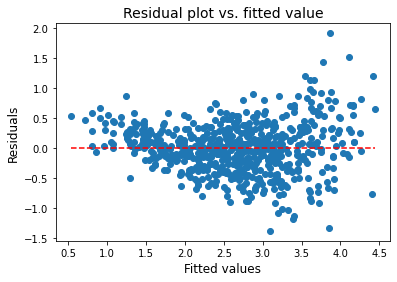

In [57]:
plt.scatter(resultsFEV.fittedvalues,resultsFEV.resid)
plt.plot([resultsFEV.fittedvalues.min(),resultsFEV.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

It is clear from the scatter plot of the residuals that the variance of the residuals is increasing with the fitted value. And the residuals are the estimate of the true error. So it is clear that we have a heteroskedasticity issue.

Let's check whether the residuals follow a normal distribution.

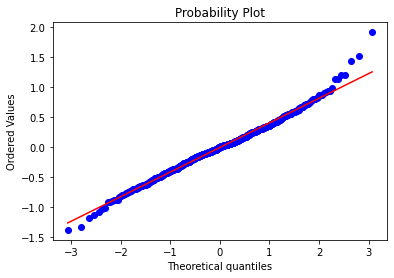

In [58]:
stats.probplot(resultsFEV.resid, plot=plt)
plt.show()

According to the QQ probability plot, the residuals seem to follow somehow the normal distribution. There seems to be some observation that falls off from the QQ probability plot, so let's check for outliers or influential points using the above-defined function for squared studentized residuals vs. leverage together with the Cook's distance.

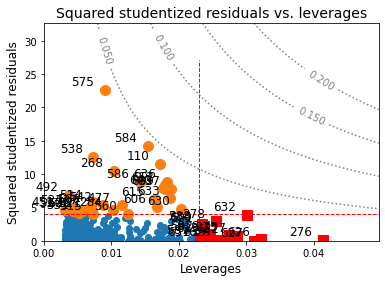

In [59]:
SquaredStudResidLeveragePlot(resultsFEV,CookLevels=[0.05,0.1,0.15,0.2],textdx=-0.005,textdy=0.7,xyscale=1.2)

Although there are plenty of observations that have either high squared standardized residuals or high leverage, none of them have both at the same time. Moreover, the biggest of Cook's distance is below 0.05, so we can eliminate the outlier problem.

First, let's suppose that the variance of the error is proportional to the mean of the dependant variable. In the book, we derived that the square-root transformation shall be applied to the response variable in such a case.

So, let's apply the OLS of the *statsmodels* library by using the square-root transformation in the formula of the OLS.

In [60]:
resultsFEV = ols(formula = 'np.sqrt(FEV) ~ Age + Ht + Gender + Smoke', data=dataLung).fit()
print(resultsFEV.summary(title='OLS Results for the lung capacity dataset'))
test = sms.het_goldfeldquandt(resultsFEV.resid, resultsFEV.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsFEV.mse_resid))

                  OLS Results for the lung capacity dataset                   
Dep. Variable:           np.sqrt(FEV)   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     657.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          1.25e-226
Time:                        22:23:17   Log-Likelihood:                 473.57
No. Observations:                 654   AIC:                            -937.1
Df Residuals:                     649   BIC:                            -914.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6232      0.064     

Looking at the OLS results, everything seems valid: the R-squared value increased, while the RMSE decreased. However, according to the Goldfeld-Quandt test, the heteroscedasticity problem still cannot be rejected.

Let's create the scatter plot of the residuals.

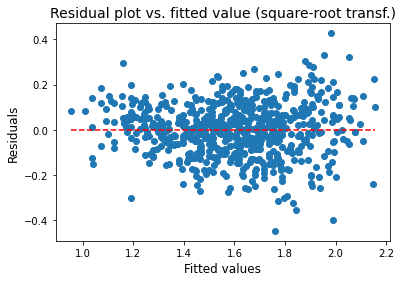

In [61]:
plt.scatter(resultsFEV.fittedvalues,resultsFEV.resid)
plt.plot([resultsFEV.fittedvalues.min(),resultsFEV.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value (square-root transf.)",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

As can be seen, the variance of the residuals is still increasing with the fitted value, although the increase is not so significant at this time.

Let's see the QQ probability plot.

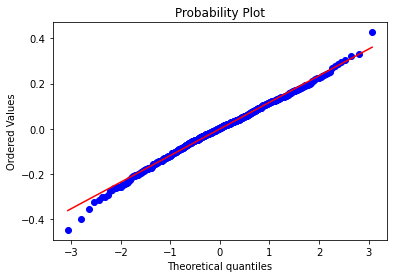

In [62]:
stats.probplot(resultsFEV.resid, plot=plt)
plt.show()

The probability plot shows that the residuals are following more prominently the normal distribution. But the heteroscedasticity is still present.

So let's check the other variance stabilizing transformation. At this time, the logarithm of the response variable using the *statsmodels* library.

In [63]:
resultsFEV = ols(formula = 'np.log(FEV) ~ Age + Ht + Gender + Smoke', data=dataLung).fit()
print(resultsFEV.summary(title='OLS Results for the lung capacity dataset'))
test = sms.het_goldfeldquandt(resultsFEV.resid, resultsFEV.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsFEV.mse_resid))

                  OLS Results for the lung capacity dataset                   
Dep. Variable:            np.log(FEV)   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     694.6
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          7.98e-233
Time:                        22:23:17   Log-Likelihood:                 335.30
No. Observations:                 654   AIC:                            -660.6
Df Residuals:                     649   BIC:                            -638.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.9440      0.079    -

The OLS results are interesting. Now, according to the t-statistic, all regression coefficients are significantly different from zero, although all of them are very close to zero. But the standard errors are very low for all of them, so we have quite good precision in the estimation of the regression coefficients. Both the R-squared and RMSE values slightly increased. But what is more important, according to the Goldfeld-Quandt test, the null hypothesis of heteroscedasticity can be rejected at this time.

We may show the scatter plot of the residuals to check this visually.

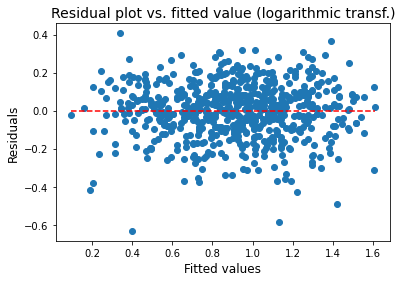

In [64]:
plt.scatter(resultsFEV.fittedvalues,resultsFEV.resid)
plt.plot([resultsFEV.fittedvalues.min(),resultsFEV.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value (logarithmic transf.)",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

Now, the residuals are scattered evenly on the plot, and there is no dependency on the value of the fitted values.

Let's show the QQ probability plot, as well.

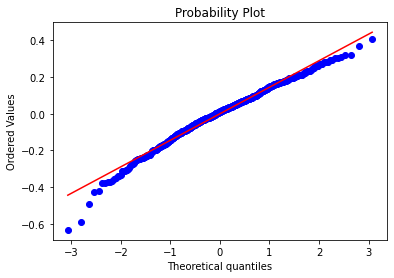

In [65]:
stats.probplot(resultsFEV.resid, plot=plt)
plt.show()

From the QQ probability plot, we can see that the residuals do not follow exactly the normal distribution. However, the heteroskedasticity problem could be eliminated only with the logarithmic transformation. 

This kind of transformation is called variance stabilizing transformation, as the variance of the residuals are "stabilized", i.e., they remain constant across the span of fitted values.

## 3. Power transformations <a name="PowerTransf"></a>

In the previous section, we tried to stabilize the variance of the residual with square-root transformation first. Although the logarithmic transformation was a better choice in stabilizing the variance, with square-root transformation the dependent variable became more normally distributed than with logarithmic transformation.

Depending on the distribution of the data, different types of non-linear transformation would be optimal. For example, depending on how well the distribution is skewed, respective whether it is left-skewed or right-skewed, you might need to use a different type of transformation.

For this reason, Box and Cox defined a family of transformations that can be used to transform the response variable. The value of lambda defines the shape of the non-linear function used in the transformation process and shall be chosen such that the transformed response variable will be normally distributed.

Because the Box-Cox transformation can be applied only to strictly positive values, Yeo and Johnson defined another family of transformations. Let's visualize them.

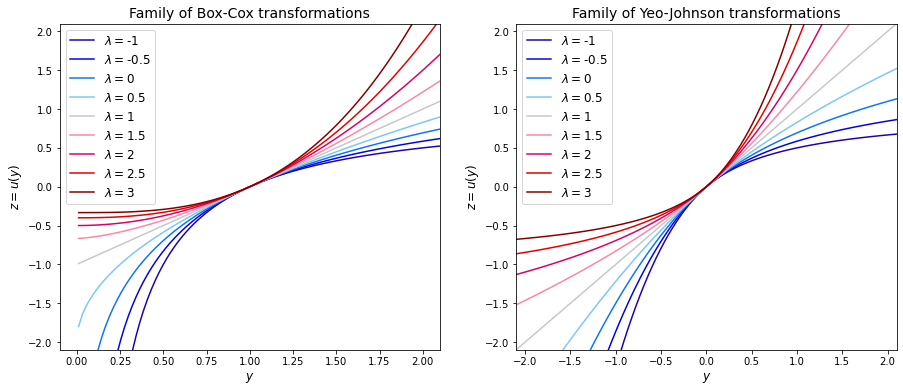

In [66]:
from sklearn.preprocessing import PowerTransformer
from scipy import stats

lambdas=[-1,-0.5,0,0.5,1,1.5,2,2.5,3]
colors=['xkcd:ultramarine','xkcd:pure blue','xkcd:deep sky blue','xkcd:lightblue','xkcd:silver',\
        'xkcd:rosa','xkcd:dark hot pink','xkcd:red','xkcd:dark red']

x=np.linspace(0.01,2.2,100)
y=np.linspace(-2.2,2.2,100)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for l,c in zip(lambdas,colors):
    ax[0].plot(x,stats.boxcox(x,l),c=c,label='$\lambda=$'+str(l))
ax[0].set_xlim(-0.1,2.1)
ax[0].set_ylim(-2.1,2.1)
ax[0].set_xlabel('$y$',fontsize=12)
ax[0].set_ylabel('$z=u(y$)',fontsize=12)
ax[0].set_title('Family of Box-Cox transformations',fontsize=14)
ax[0].legend(fontsize=12)

for l,c in zip(lambdas,colors):
    ax[1].plot(y,stats.yeojohnson(y,l),c=c,label='$\lambda=$'+str(l))
ax[1].set_xlim(-2.1,2.1)
ax[1].set_ylim(-2.1,2.1)
ax[1].set_xlabel('$y$',fontsize=12)
ax[1].set_ylabel('$z=u(y)$',fontsize=12)
ax[1].set_title('Family of Yeo-Johnson transformations',fontsize=14)
ax[1].legend(fontsize=12)

plt.show()

### Lung capacity

Considering the previous example, let's check what would be the optimal lambda value for transforming the FEV predictor into a normal distribution.

The lambda value is obtained with the maximum likelihood estimator (MLE). Because the value of the lambda depends on the actual random sample used in MLE,  a 95% confidence interval is also provided.

In [67]:
tfdata,lopt,lconf=stats.boxcox(dataLung['FEV'],alpha=0.05)
print("Optimal value for lambda:", lopt)
print("95% confidence interval:",lconf)

Optimal value for lambda: 0.2220644674070832
95% confidence interval: (0.027274356955738155, 0.4189020140558284)


To see how the likelihood function depends on the lambda value, we may even create a plot of the log-likelihood as a function of lambda (the 95% percent confidence interval is also shown).

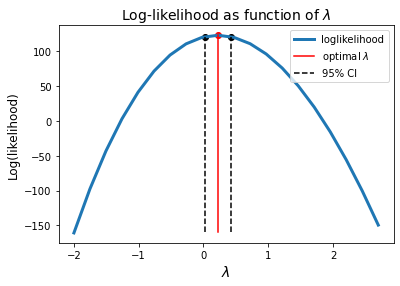

Optimal value: 0.2220644674070832
95% CI: (0.027274356955738155, 0.4189020140558284)


In [68]:
lambdainterval=np.linspace(-2,2.7,20)
plt.plot(lambdainterval,[stats.boxcox_llf(l,dataLung['FEV']) for l in lambdainterval],lw=3,label='loglikelihood')
plt.scatter(lopt,stats.boxcox_llf(lopt,dataLung['FEV']),c='r')
plt.scatter(lconf[0],stats.boxcox_llf(lconf[0],dataLung['FEV']),c='k')
plt.scatter(lconf[1],stats.boxcox_llf(lconf[1],dataLung['FEV']),c='k')
plt.plot([lopt,lopt],[-160,stats.boxcox_llf(lopt,dataLung['FEV'])],'r',label='optimal $\lambda$')
plt.plot([lconf[0],lconf[0]],[-160,stats.boxcox_llf(lconf[0],dataLung['FEV'])],'k--',label='95% CI')
plt.plot([lconf[1],lconf[1]],[-160,stats.boxcox_llf(lconf[1],dataLung['FEV'])],'k--')
plt.title('Log-likelihood as function of $\lambda$',fontsize=14)
plt.xlabel('$\lambda$',fontsize=14)
plt.ylabel('Log(likelihood)',fontsize=12)
plt.legend()
plt.show()
print("Optimal value:",lopt)
print("95% CI:",lconf)

We may use the *scikit-learn* library to obtain the optimal lambda value and to transform the dependent variable.

In [69]:
from sklearn.preprocessing import PowerTransformer
pwrtransf=PowerTransformer(method='box-cox')
dataLung['trFEV']=pwrtransf.fit_transform(np.array(dataLung['FEV']).reshape(-1, 1))
pwrtransf.lambdas_

array([0.22206447])

Then print out the OLS results using the *statsmodels* library.

In [70]:
resultsFEV = ols(formula = 'trFEV ~ Age + Ht + Gender + Smoke', data=dataLung).fit()
print(resultsFEV.summary(title='OLS Results for the lung capacity dataset'))
test = sms.het_goldfeldquandt(resultsFEV.resid, resultsFEV.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsFEV.mse_resid))

                  OLS Results for the lung capacity dataset                   
Dep. Variable:                  trFEV   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     689.0
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          6.65e-232
Time:                        22:23:20   Log-Likelihood:                -385.96
No. Observations:                 654   AIC:                             781.9
Df Residuals:                     649   BIC:                             804.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.5362      0.237    -

As can be seen from the OLS results, according to the Goldfeld-Quandt test, the null hypothesis of heteroscedasticity cannot be rejected.

Let's create the QQ probability plot.

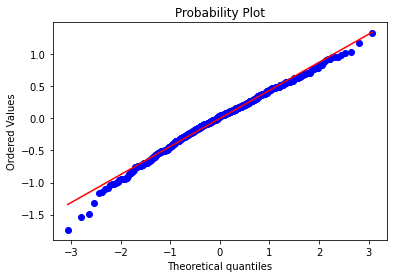

In [71]:
stats.probplot(resultsFEV.resid, plot=plt)
plt.show()

Except for a few observations, the residuals follow the normal distribution.

Let's create the scatter plot of the residuals vs. the fitted values.

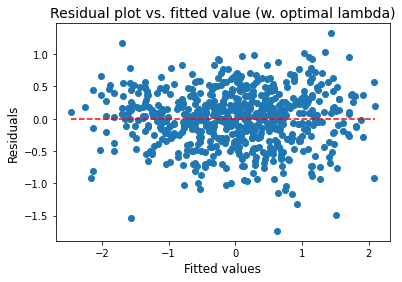

In [72]:
plt.scatter(resultsFEV.fittedvalues,resultsFEV.resid)
plt.plot([resultsFEV.fittedvalues.min(),resultsFEV.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value (w. optimal lambda)",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

As can be seen, the Box-Cox transformation will make the dependent variable more normally distributed, but that will not stabilize the variance of the residuals enough.

As can be seen, the Box-Cox transformation will make the dependent variable more normally distributed, but that will not stabilize the variance of the residuals enough.

### Red wine quality

Let's take another example where the predictors are all physical variables that take only positive values (but some of them can be even zero), thus they are not normally distributed and skewed to the left. These physical independent variables may determine the quality of the red wine.

Let's read the dataset.

In [73]:
dataWine=pd.read_csv(os.path.join('data','winequality-red.csv'),sep=';')
dataWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


As can be seen the predictors are chemicals inside the red wine which might determine its quality. The quality can take only discrete values, however, this does not concerns as to consider it as a numerical variable, just like in case of the age of a person.

We may print out the statistics, like mean, min. max. of each variable.

In [74]:
dataWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As can be seen from the minimum values, all input variables are strictly positive, except for citric acid, which can also have zero values.

As response variable has only discrete values, we may check this with the unique function of the *pandas* library.

In [75]:
dataWine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

We may even create the scatter plot matrix to visualize the distribution, respective the pair-wise correlaton.

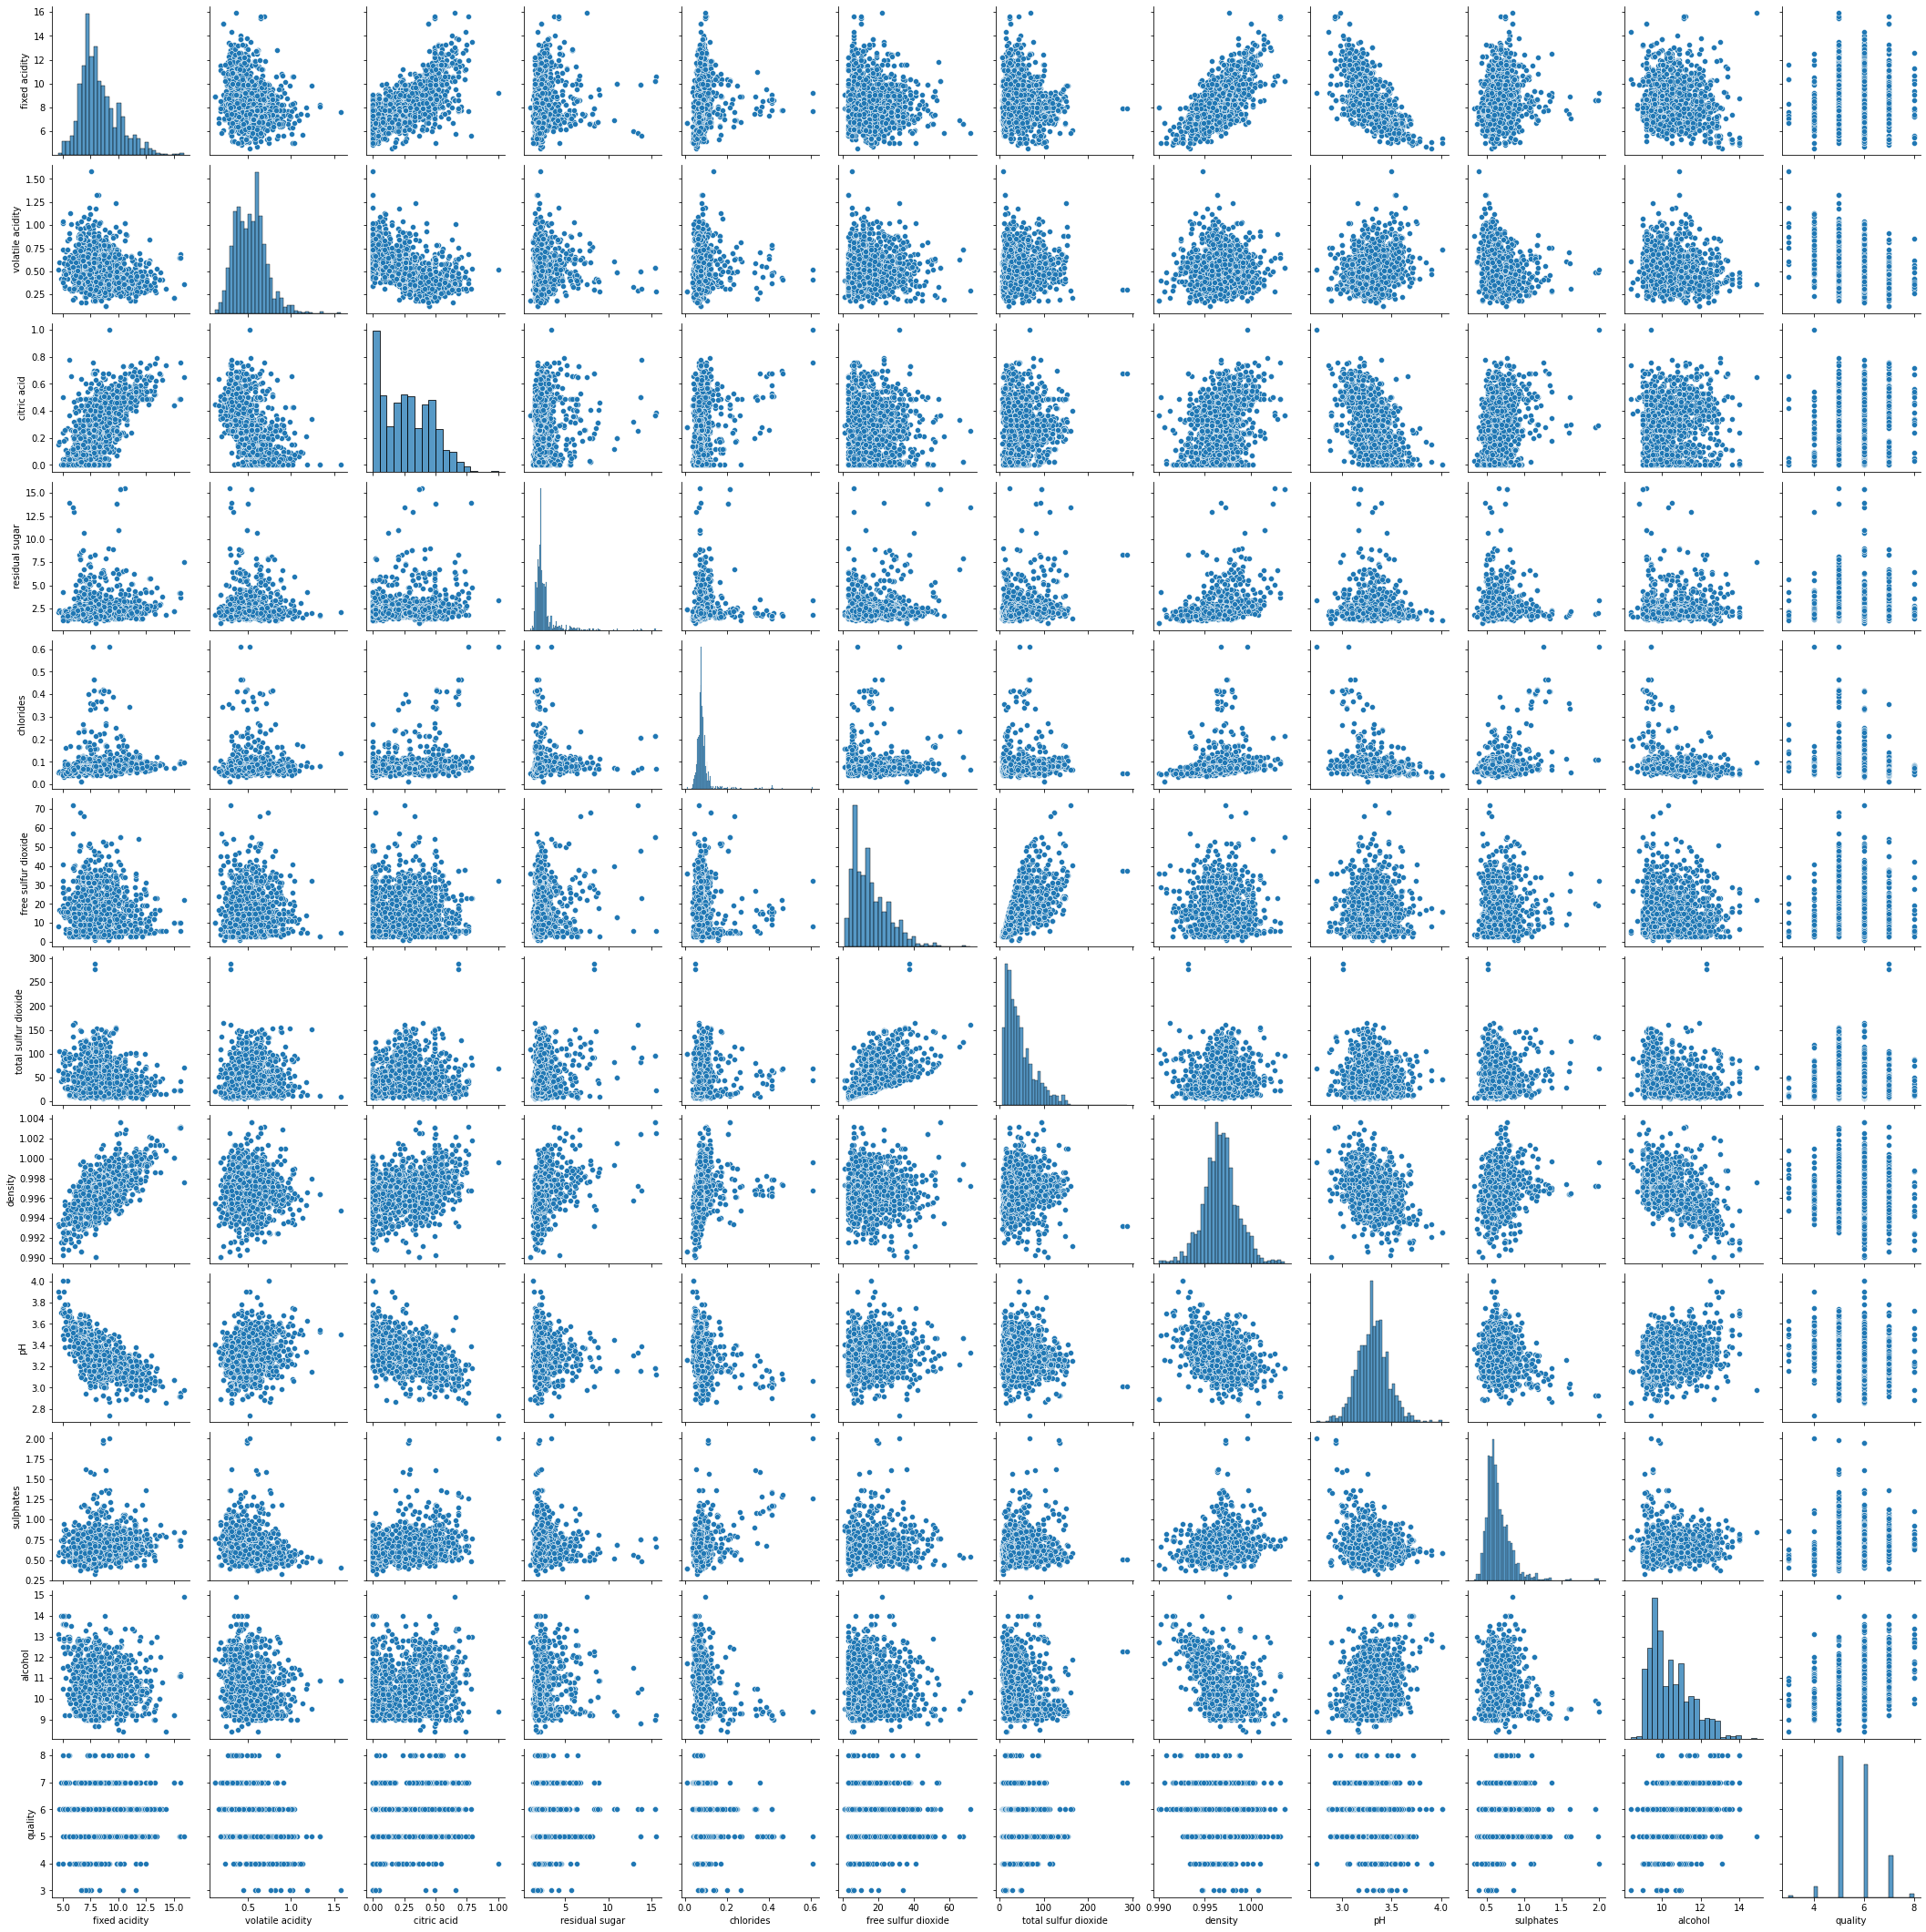

In [76]:
sns.pairplot(dataWine)
plt.show()

As can be seen, most of the chemical comonents have a left-skewed distribution.

For better visibility, you may create the histogram of each variable.

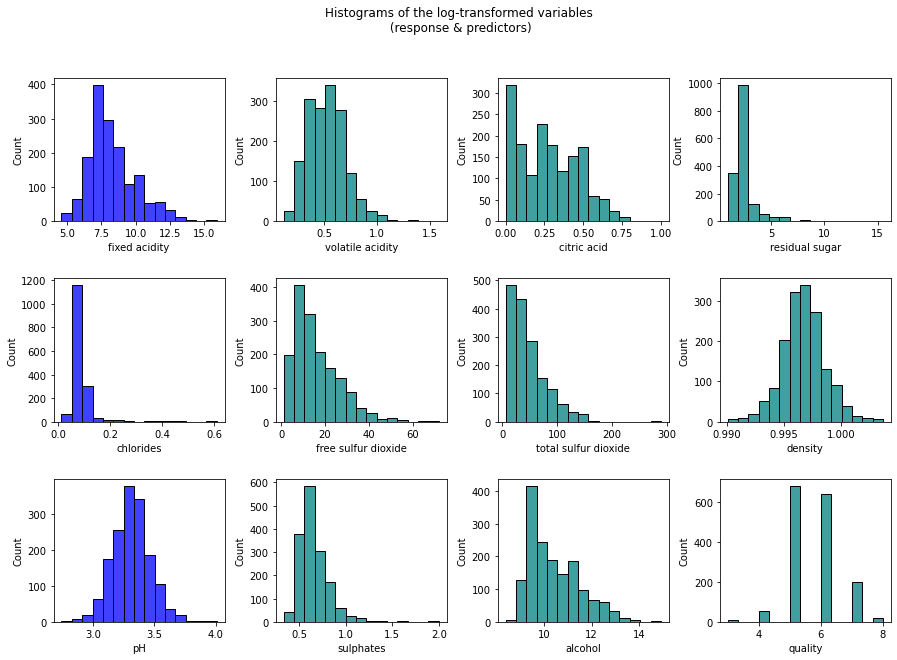

In [77]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

sns.histplot(dataWine["fixed acidity"] , bins=15, color="blue", ax=axes[0, 0],kde=False)
sns.histplot(dataWine["volatile acidity"] , bins=15, color="teal", ax=axes[0, 1],kde=False)
sns.histplot(dataWine["citric acid"] , bins=15, color="teal", ax=axes[0, 2],kde=False)
sns.histplot(dataWine["residual sugar"] , bins=15, color="teal", ax=axes[0, 3],kde=False)

sns.histplot(dataWine["chlorides"] , bins=15, color="blue", ax=axes[1, 0],kde=False)
sns.histplot(dataWine["free sulfur dioxide"] , bins=15, color="teal", ax=axes[1, 1],kde=False)
sns.histplot(dataWine["total sulfur dioxide"] , bins=15, color="teal", ax=axes[1, 2],kde=False)
sns.histplot(dataWine["density"] , bins=15, color="teal", ax=axes[1, 3],kde=False)

sns.histplot(dataWine["pH"] , bins=15, color="blue", ax=axes[2, 0],kde=False)
sns.histplot(dataWine["sulphates"] , bins=15, color="teal", ax=axes[2, 1],kde=False)
sns.histplot(dataWine["alcohol"] , bins=15, color="teal", ax=axes[2, 2],kde=False)
sns.histplot(dataWine["quality"] , bins=15, color="teal", ax=axes[2, 3],kde=False)

fig.suptitle("Histograms of the log-transformed variables\n (response & predictors)")
plt.show()

Even though the quality has only discrete values, we may still treat it as a numerical (quantitative) variable, so let's check how close its distribution is to the normal.

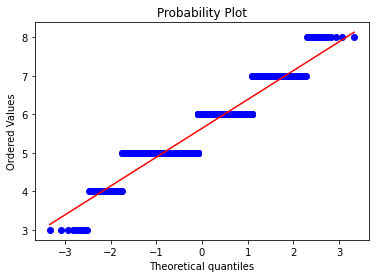

In [78]:
stats.probplot(dataWine['quality'], plot=plt)
plt.show()

Now, using the *statsmodels* library print out the OLS resutls.

In [79]:
resultsWine = ols(formula = "quality ~ Q('fixed acidity') +Q('volatile acidity') + Q('citric acid') + Q('residual sugar') + \
chlorides + Q('free sulfur dioxide') + Q('total sulfur dioxide') + density+ pH + sulphates + alcohol", data=dataWine).fit()
print(resultsWine.summary(title='OLS Results for the red wine quality dataset'))
test = sms.het_goldfeldquandt(resultsWine.resid, resultsWine.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsWine.mse_resid))

                 OLS Results for the red wine quality dataset                 
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          1.79e-145
Time:                        22:23:49   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Based on the Jarque-Bera test, we cannot reject the null hypothesis that the residuals are normally distributed. And based on the Goldfeld-Quandt test, we can reject the null hypothesis that there is heteroskedacticity issue. Based on t-statistics, half of the regression coefficients are not significanlty different from zero.

Let's create the QQ probability plot of the OLS residuals.

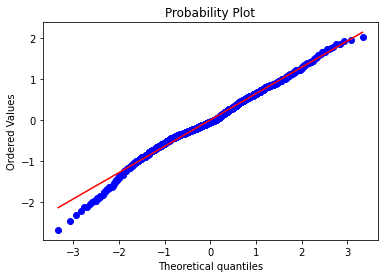

In [80]:
stats.probplot(resultsWine.resid, plot=plt)
plt.show()

The residuals do not follow exactly the normal distribution.

One might argue, that the independent variables are not normally distributed, so let's apply the Cox-Box trnasformation on each input variable independently (i.e., with a different traansformation function depending on the optimal value of lambda) and then compare the result. Because the response variable has only discrete values, that will not be changed.

Because the Cox-Box transformation only allows strictly positive values, one workaround would be to add a very small postive value to the variable of 'citric acid'.

In [81]:
dataWine['citric acid']=dataWine['citric acid']+0.001

Then only after apply the box-cox transformation at once to all input variables using scikit-learn library.

In [82]:
pwrtransf=PowerTransformer(method='box-cox')
dataWineTr=pd.DataFrame(data=pwrtransf.fit_transform(dataWine.drop('quality',axis=1)),columns=dataWine.columns[:-1])
dataWineTr['quality']=dataWine['quality']
dataWineTr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.441315,0.981174,-1.911884,-0.577089,-0.163047,-0.265007,-0.123215,0.564412,1.275652,-0.562977,-1.075000,5
1,-0.160840,1.770023,-1.911884,0.539619,0.647660,0.987787,0.852473,0.036931,-0.709469,0.390599,-0.499774,5
2,-0.160840,1.256392,-1.201362,0.151544,0.454911,0.190833,0.538557,0.142815,-0.310227,0.186200,-0.499774,5
3,1.521328,-1.544540,1.256394,-0.577089,-0.207923,0.380675,0.691456,0.669328,-0.979934,-0.375760,-0.499774,6
4,-0.441315,0.981174,-1.911884,-0.577089,-0.163047,-0.265007,-0.123215,0.564412,1.275652,-0.562977,-1.075000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.459703,0.489039,-0.844172,-0.365068,0.386540,1.394610,0.243686,-0.978740,0.905895,-0.375760,0.293583,5
1595,-1.767469,0.224349,-0.698063,-0.003620,-0.883824,1.731306,0.455950,-0.860225,1.336645,0.854542,0.887768,6
1596,-1.362573,0.001996,-0.502561,0.151544,-0.163047,1.230633,0.107497,-0.527517,0.718528,0.802125,0.734499,6
1597,-1.767469,0.716154,-0.565118,-0.365068,-0.207923,1.394610,0.243686,-0.672173,1.638960,0.577213,-0.017730,5


We may print out the optimal lambda values for each variable.

In [83]:
pwrtransf.lambdas_

array([-0.66861664,  0.39966353,  0.52707314, -1.18034763, -0.45750078,
        0.14508107,  0.05073422, -8.15925828, -0.0290975 , -1.06205896,
       -3.32606155])

Let's visualize the histograms of the variables after the Box-Cox trasformation.

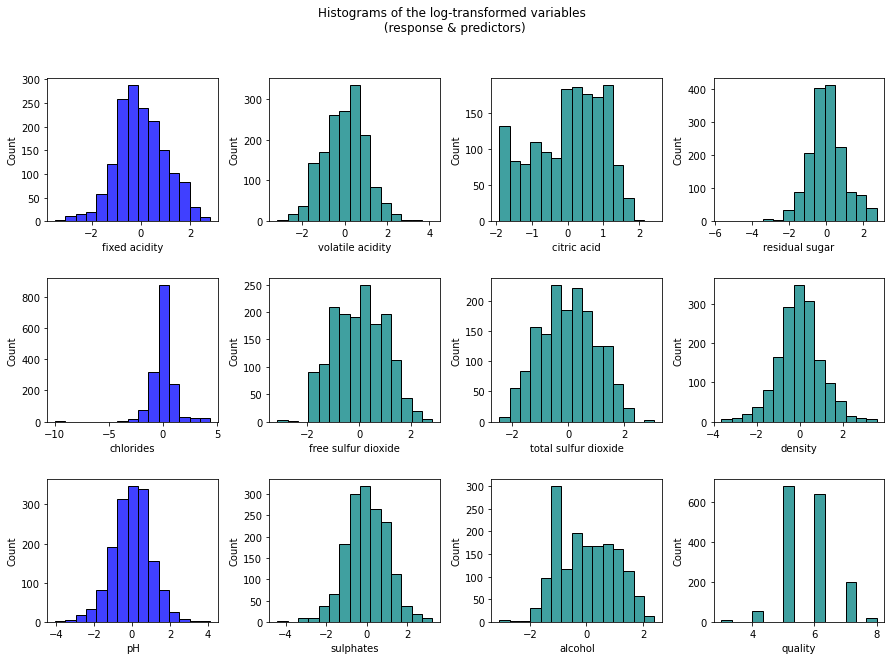

In [84]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

sns.histplot(dataWineTr["fixed acidity"] , bins=15, color="blue", ax=axes[0, 0],kde=False)
sns.histplot(dataWineTr["volatile acidity"] , bins=15, color="teal", ax=axes[0, 1],kde=False)
sns.histplot(dataWineTr["citric acid"] , bins=15, color="teal", ax=axes[0, 2],kde=False)
sns.histplot(dataWineTr["residual sugar"] , bins=15, color="teal", ax=axes[0, 3],kde=False)

sns.histplot(dataWineTr["chlorides"] , bins=15, color="blue", ax=axes[1, 0],kde=False)
sns.histplot(dataWineTr["free sulfur dioxide"] , bins=15, color="teal", ax=axes[1, 1],kde=False)
sns.histplot(dataWineTr["total sulfur dioxide"] , bins=15, color="teal", ax=axes[1, 2],kde=False)
sns.histplot(dataWineTr["density"] , bins=15, color="teal", ax=axes[1, 3],kde=False)

sns.histplot(dataWineTr["pH"] , bins=15, color="blue", ax=axes[2, 0],kde=False)
sns.histplot(dataWineTr["sulphates"] , bins=15, color="teal", ax=axes[2, 1],kde=False)
sns.histplot(dataWineTr["alcohol"] , bins=15, color="teal", ax=axes[2, 2],kde=False)
sns.histplot(dataWineTr["quality"] , bins=15, color="teal", ax=axes[2, 3],kde=False)

fig.suptitle("Histograms of the log-transformed variables\n (response & predictors)")
plt.show()

Then print out the OLS results using the *statsmodels* library. 

In [85]:
resultsWineTr = ols(formula = "quality ~ Q('fixed acidity') +Q('volatile acidity') + Q('citric acid') + Q('residual sugar') + \
chlorides + Q('free sulfur dioxide') + Q('total sulfur dioxide') + density+ pH + sulphates + alcohol", data=dataWineTr).fit()
print(resultsWineTr.summary(title='OLS Results for the lung capacity dataset'))
test = sms.het_goldfeldquandt(resultsWineTr.resid, resultsWineTr.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsWineTr.mse_resid))

                  OLS Results for the lung capacity dataset                   
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     85.03
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          5.40e-151
Time:                        22:23:52   Log-Likelihood:                -1556.2
No. Observations:                1599   AIC:                             3136.
Df Residuals:                    1587   BIC:                             3201.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

This may be a counterexample that transforming the input variables to have a normal distribution for each is not a requirement for the OLS and by doing so we do not obtain a better result.

Let's create the QQ probability plot of the OLS residuals.

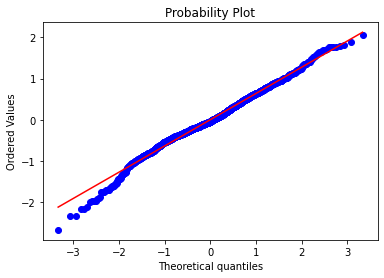

In [86]:
stats.probplot(resultsWineTr.resid, plot=plt)
plt.show()

Let's apply now the Yeo-Johnson transformation on the original dataset (without adding the small positive value to the citric acid). We may need to read the dataset again first.

In [87]:
dataWine=pd.read_csv(os.path.join('data','winequality-red.csv'),sep=';')
pwrtransf=PowerTransformer(method='yeo-johnson')
dataWineTr=pd.DataFrame(data=pwrtransf.fit_transform(dataWine.drop('quality',axis=1)),columns=dataWine.columns[:-1])
dataWineTr['quality']=dataWine['quality']
dataWineTr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036966,-0.709517,0.395140,-0.500860,5
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,5
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,6
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864,5
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860224,1.336627,0.874884,0.888124,6
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558,6
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800,5


We may print out the optimal lambda values for the Yeo-johnson transformations.

In [88]:
pwrtransf.lambdas_

array([ -0.87463627,  -0.78000911,  -0.32510514,  -2.0399636 ,
       -18.38061441,   0.07053858,   0.0238631 , -17.4225683 ,
        -0.35702578,  -4.03103339,  -3.71732844])

And finally, print out the OLS results for the transformed dataset.

In [89]:
resultsWineTr = ols(formula = "quality ~ Q('fixed acidity') +Q('volatile acidity') + Q('citric acid') + Q('residual sugar') + \
chlorides + Q('free sulfur dioxide') + Q('total sulfur dioxide') + density+ pH + sulphates + alcohol", data=dataWineTr).fit()
print(resultsWineTr.summary(title='OLS Results for the lung capacity dataset'))
test = sms.het_goldfeldquandt(resultsWineTr.resid, resultsWineTr.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsWineTr.mse_resid))

                  OLS Results for the lung capacity dataset                   
Dep. Variable:                quality   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     84.75
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          1.38e-150
Time:                        22:23:52   Log-Likelihood:                -1557.2
No. Observations:                1599   AIC:                             3138.
Df Residuals:                    1587   BIC:                             3203.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Let's check again the QQ normality plot of the OLS residuals.

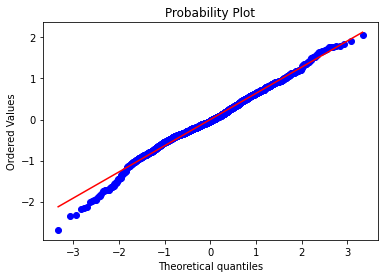

In [90]:
stats.probplot(resultsWineTr.resid, plot=plt)
plt.show()

As a conclusion OLS does not require to have normally distributed input variables. There is no such requirement for the dependent variable. the only requiremet is that if you want statistical testing then the residuals should follow a normal distribution. In this example, this is satisfied using the original data.

## 4. Quantile transformation <a name="Quantile"></a>

Quantile transformation or quantile normalization is frequently used in DNA microarray data analysis. Here we will use another dataset that is included in the *scikit-learn* library, namely, the Boston house dataset. The target is the price of the house, and we want to fit a linear regression model using several attributes related to the house. In this part of the lab exercise, we will see how the quantile transformation of the target influences the goodness-of-fit of the MLR.

**Note:** *We will look to this dataset more rigorously in Lab exercise 3.11: Polynomial regression.*

Let's load the dataset and print out the description.

In [91]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Then convert to a *pandas* dataframe.

In [92]:
data=pd.DataFrame(boston['data'],columns=boston['feature_names'])
data['PRICE']=boston['target']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Let's check the distribution of the predictors.

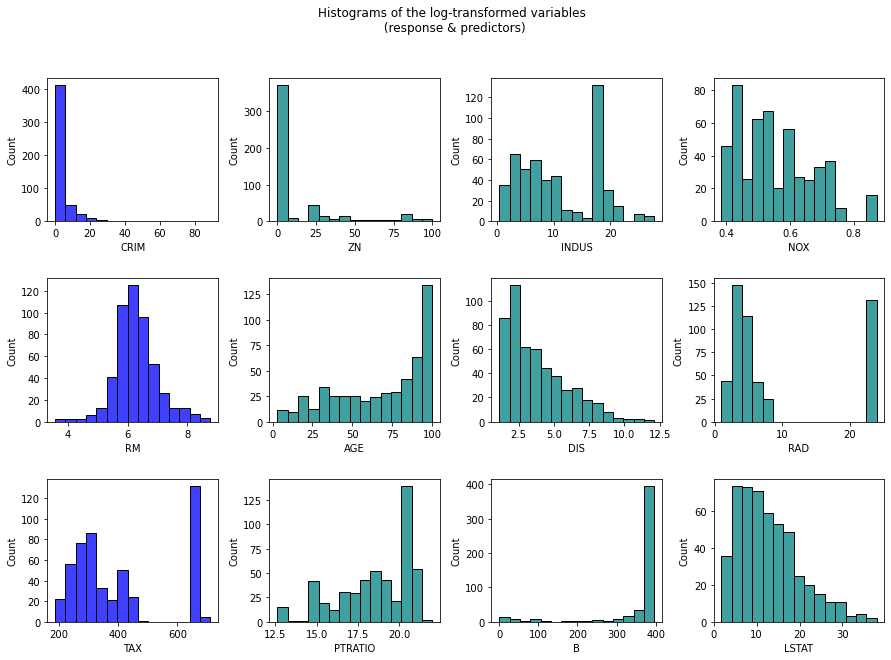

In [93]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

sns.histplot(data["CRIM"] , bins=15, color="blue", ax=axes[0, 0],kde=False)
sns.histplot(data["ZN"] , bins=15, color="teal", ax=axes[0, 1],kde=False)
sns.histplot(data["INDUS"] , bins=15, color="teal", ax=axes[0, 2],kde=False)
sns.histplot(data["NOX"] , bins=15, color="teal", ax=axes[0, 3],kde=False)

sns.histplot(data["RM"] , bins=15, color="blue", ax=axes[1, 0],kde=False)
sns.histplot(data["AGE"] , bins=15, color="teal", ax=axes[1, 1],kde=False)
sns.histplot(data["DIS"] , bins=15, color="teal", ax=axes[1, 2],kde=False)
sns.histplot(data["RAD"] , bins=15, color="teal", ax=axes[1, 3],kde=False)

sns.histplot(data["TAX"] , bins=15, color="blue", ax=axes[2, 0],kde=False)
sns.histplot(data["PTRATIO"] , bins=15, color="teal", ax=axes[2, 1],kde=False)
sns.histplot(data["B"] , bins=15, color="teal", ax=axes[2, 2],kde=False)
sns.histplot(data["LSTAT"] , bins=15, color="teal", ax=axes[2, 3],kde=False)

fig.suptitle("Histograms of the log-transformed variables\n (response & predictors)")
plt.show()

We will print out the OLS results using the *statsmodels* library but omitting the following predictors: INDUS and AGE. 

In [94]:
resultsB = ols(formula = "PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT", data=data).fit()
print(resultsB.summary(title='OLS Results for the Boston house dataset'))
test = sms.het_goldfeldquandt(resultsB.resid, resultsB.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsB.mse_resid))

                   OLS Results for the Boston house dataset                   
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          5.54e-137
Time:                        22:23:55   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

There are two problems: the condition number is high, respective according to the Goldfeld-Quandt test, we cannot reject the null hypothesis of heteroskedasticity.

Let's check the scatter plot of the residuals.

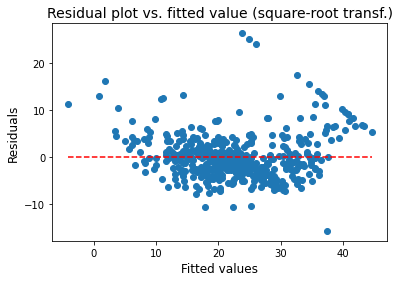

In [95]:
plt.scatter(resultsB.fittedvalues,resultsB.resid)
plt.plot([resultsB.fittedvalues.min(),resultsB.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value (square-root transf.)",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

From this figure, it is not visible whether the residual variance depends on the fitted value or not.

Let's check the normality of the residuals with the QQ probability plot.

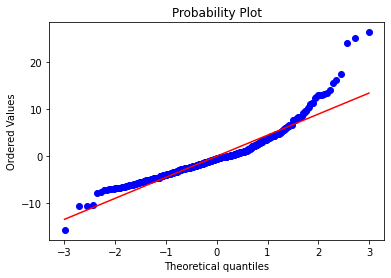

In [96]:
stats.probplot(resultsB.resid, plot=plt)
plt.show()

It is clear from the above figure that the residuals are not normally distributed.

Let's quantile normalize two of the predictors (DIS and LSTAT) using the *scikit-learn* library.

**Note:** *We saw in the previous example with the "Red wine quality" dataset that normalizing the predictors is not a requirement for the OLS to be BLUE. However, we also saw in the case of the "Mammal species" dataset that making a non-linear transformation on the predictor might increase the linear relationship between the response and predictors.*

In [97]:
from sklearn.preprocessing import QuantileTransformer
qtransf=QuantileTransformer(n_quantiles=300,output_distribution='normal',copy=True)
data['Q_DIS'] = qtransf.fit_transform(np.array(data['DIS']).reshape(-1,1))
data['Q_LSTAT'] = qtransf.fit_transform(np.array(data['LSTAT']).reshape(-1,1))

Let's create the histogram of the two predictors before and after the quantile transformation.

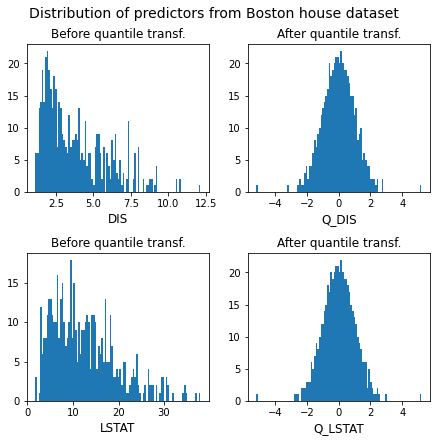

In [98]:
fig, [[ax0, ax1],[ax2,ax3]] = plt.subplots(2, 2, figsize=(7,7))

ax0.hist(data['DIS'], bins=100)
ax0.set_xlabel('DIS',fontsize=12)
ax0.set_title('Before quantile transf.')

ax1.hist(data['Q_DIS'], bins=100)
ax1.set_xlabel('Q_DIS',fontsize=12)
ax1.set_title('After quantile transf.')

ax2.hist(data['LSTAT'], bins=100)
ax2.set_xlabel('LSTAT',fontsize=12)
ax2.set_title('Before quantile transf.')

ax3.hist(data['Q_LSTAT'], bins=100)
ax3.set_xlabel('Q_LSTAT',fontsize=12)
ax3.set_title('After quantile transf.')

fig.suptitle("Distribution of predictors from Boston house dataset", y=0.92,fontsize=14)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

And finally print out the OLS results for the modified dataset using the statsmodels library.

In [99]:
resultsB = ols(formula = "PRICE ~ CRIM+ZN+CHAS+NOX+RM+Q_DIS+RAD+TAX+PTRATIO+B+Q_LSTAT", data=data).fit()
print(resultsB.summary(title='OLS Results for the Boston house dataset'))
test = sms.het_goldfeldquandt(resultsB.resid, resultsB.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsB.mse_resid))

                   OLS Results for the Boston house dataset                   
Dep. Variable:                  PRICE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     178.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          2.71e-164
Time:                        22:23:56   Log-Likelihood:                -1434.1
No. Observations:                 506   AIC:                             2892.
Df Residuals:                     494   BIC:                             2943.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.4369      4.084      7.209      0.0

As can be seen, a slight improvement could be achieved with quantile transformation: the adjusted R-squared value increased from 0.74 to 0.8 while the RMSE decreased from 4.74 to 4.17.

However, we still have a heteroskedasticity problem, and the condition number is still large. Let's create the scatter plot of the OLS residuals.

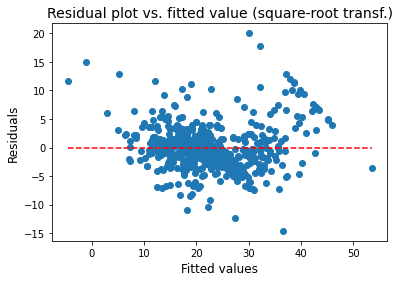

In [100]:
plt.scatter(resultsB.fittedvalues,resultsB.resid)
plt.plot([resultsB.fittedvalues.min(),resultsB.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value (square-root transf.)",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

No change can be seen.

We may also crete the QQ probability plot.

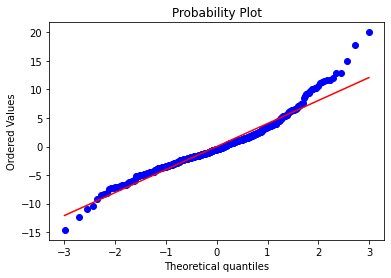

In [101]:
stats.probplot(resultsB.resid, plot=plt)
plt.show()

The residuals are still not following the normal distribution, although the observations are closer now to the line of normality distribution. 

We will stop our investigation here for this dataset, as we were focusing only to demonstrate the quantile transformation.

## 5. Normalizing the data <a name="DataNormalization"></a>

Normalization means that you have unit vectors for each observation (i.e., the p-norm of each row of the input matrix equals one). Scaling inputs to unit norms is a common operation for text classification or clustering, for instance. 

**Note:** *Some data scientists talk about data normalization when they mean feature scaling or standardization.*

Let's calculate the Euclidean norm of each observation for a uniform random distribution filling a cube.

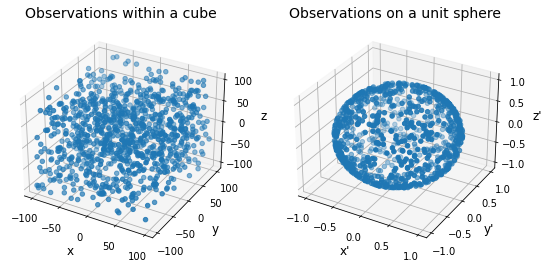

In [102]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer

# draw from a uniform distribution the values for x, y, and z
random=np.random.randint(-100, 100, size=(10,10,10)).astype(float)
# and convert them the a pandas dataframe
x=(np.array([random[:,i,j] for i in range(10) for j in range(10)])).reshape(1000,1)
y=(np.array([random[i,:,j] for i in range(10) for j in range(10)])).reshape(1000,1)
z=(np.array([random[i,j,:] for i in range(10) for j in range(10)])).reshape(1000,1)
df=pd.DataFrame(data=np.array([x,y,z]).squeeze().T,columns=['x','y','z'])

# normalized the values using scikit learn
scaler = Normalizer(norm='l2')
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Create the 3D plots of the original and normalized data
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x'], df['y'], df['z'])
ax1.set_title('Observations within a cube',fontsize=14)
ax1.set_xlabel('x',fontsize=12)
ax1.set_ylabel('y',fontsize=12)
ax1.set_zlabel('z',fontsize=12)
ax2.scatter(scaled_df['x'], scaled_df['y'], scaled_df['z'])
ax2.set_title('Observations on a unit sphere',fontsize=14)
ax2.set_xlabel("x'",fontsize=12)
ax2.set_ylabel("y'",fontsize=12)
ax2.set_zlabel("z'",fontsize=12)
plt.show()

As can be seen, after normalization, all the data points lie on the surface of the unit sphere.

We may check that the transformed observations are really residing on the surface of a unit sphere. But first, let's check the mean value of the x, y, and z to see if the center of the sphere is the origin.

In [103]:
scaled_df.mean()

x   -0.003997
y    0.001037
z    0.001845
dtype: float64

Because the observations are randomly chosen, we should not expect an exact zero value. So, we can conclude that center of the sphere is the origin.

Now, let's check that the sum of squared values of each row is one (each row corresponding to an observation). Remember, the equation of the unit sphere with a center as the origin is $x^2+y^2+z^2=1$.

In [104]:
(np.array(scaled_df)**2).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

And indeed, they are all one, so we are sure that all observations are lying on the surface of a unit sphere.

We may use the formula derived in the book to obtain the normalized data. We may compare the outcome with the scikit-learn *Transformer*.

In [105]:
def norm(X,p):
    return X/np.sum(np.abs(X)**p,axis=1,keepdims=True)**(1/p)
X=np.array(df)
Xn=norm(X,p=2)
np.sum(np.abs(Xn-np.array(scaled_df)))

0.0

As can be seen, they are equal. If we use the "l1" norm for positive values only, then the transformed data may be interpreted as probabilities. In this case, each row will sum up to 1, and each feature for a given observation has that probability.

In [106]:
scaler = Normalizer(norm='l1')
scaled_df = scaler.fit_transform(np.abs(X))
scaled_df

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5035461 , 0.20567376, 0.29078014],
       [0.39411765, 0.14117647, 0.46470588],
       ...,
       [0.26785714, 0.58928571, 0.14285714],
       [0.64900662, 0.30463576, 0.04635762],
       [0.33333333, 0.33333333, 0.33333333]])

We may check the result with our function.

In [107]:
Xn=norm(np.abs(X),p=1)
np.sum(np.abs(Xn-np.array(scaled_df)))

0.0

Finally, we can check that the sum of each row of the transformed data with "l1" norm is one.

In [108]:
scaled_df.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

And indeed the sum of each row is 1.

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).